In [3]:
fs <- function(width=10, height=10){
    options(repr.plot.width=width, repr.plot.height=height)
    }
r <- function(data){
    data <- readRDS(paste0("txt/",data,".rds"))
    return(data)
}
library(Seurat)
source('Rscript/rprofile.r')
source('Rscript/mybasic.r')

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Fig. 2.

png 
  2

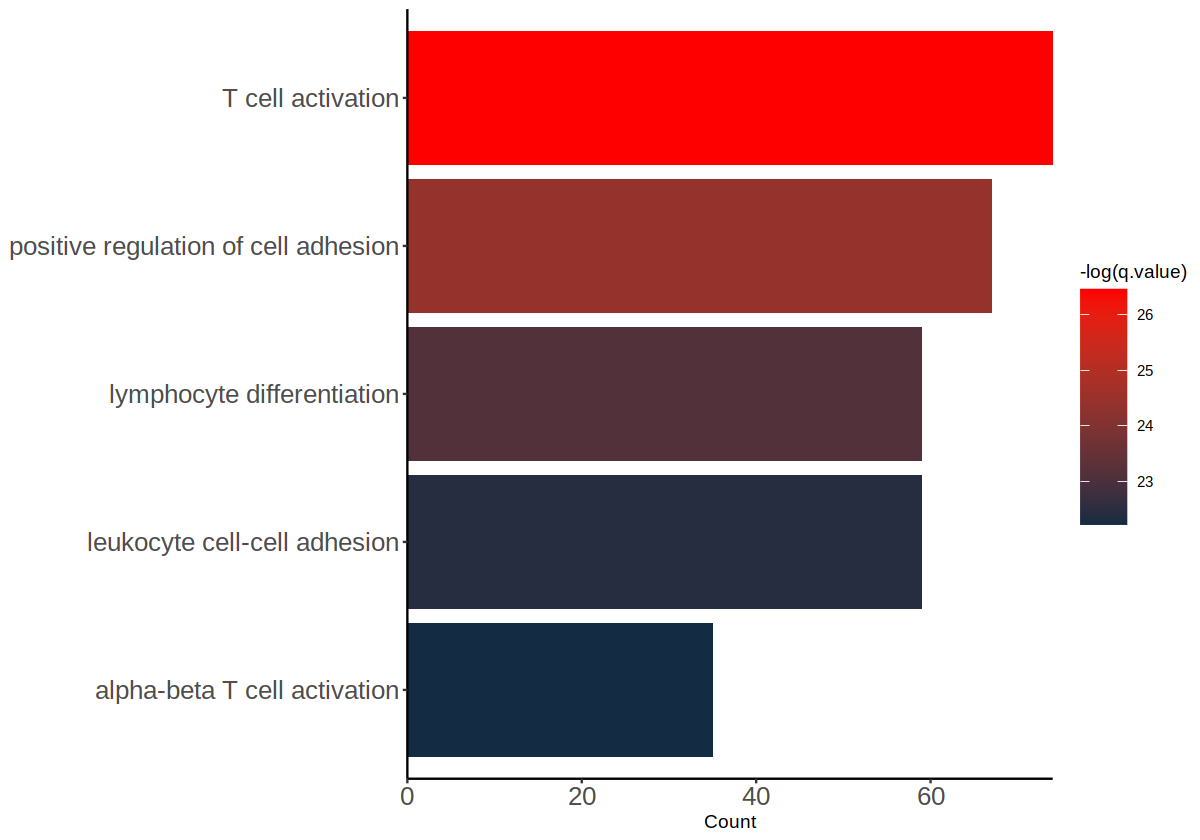

In [2]:
width = 10
height = 7

csv <- read.csv('txt/230323_rand_goenrichment_csf_vs_publiccsf.csv')
csv %>% dplyr::filter(Cluster == 'up') -> csv
head(csv, n=5) -> csv2

csv2$qvalue <- -log(csv2$qvalue)
fs(width,height)
g <- ggplot(csv2, aes(y = Description, x = Count, fill = qvalue)) +
  geom_bar(stat = "identity") + 
theme_classic() + 
scale_fill_gradient(high = "Red") + 
labs(fill='-log(q.value)') + 
theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), axis.title.y = element_blank()) + 
theme(legend.key.size = unit(1,"cm")) + 
scale_x_continuous(expand = c(0,0))
g

pdf('Fig2.D.pdf', width=width, height=height)
g
dev.off()



png 
  2

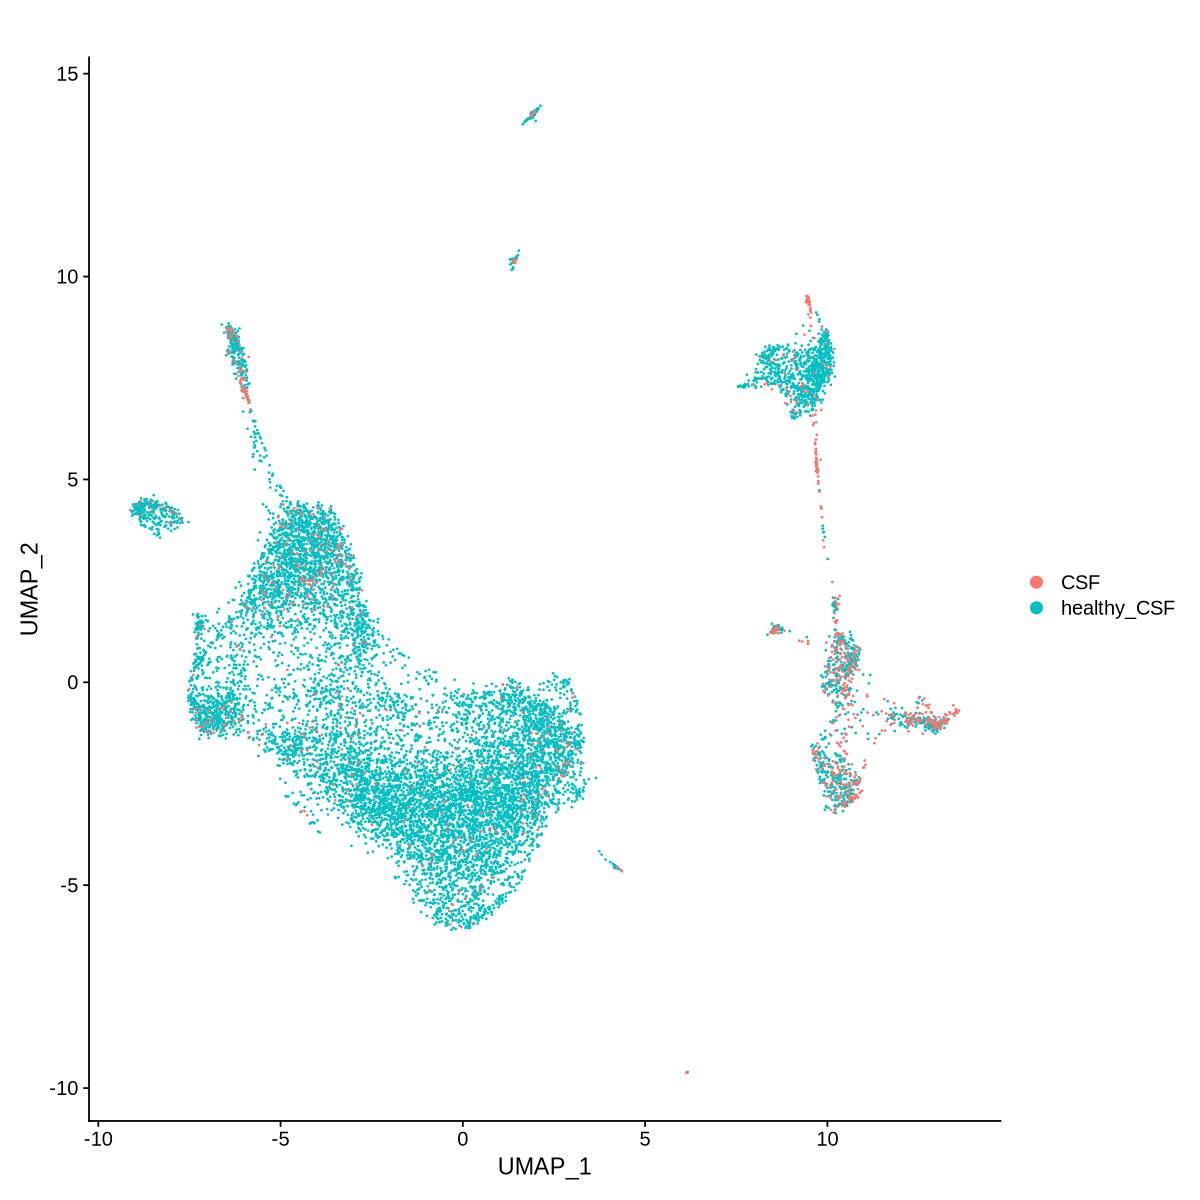

png 
  2

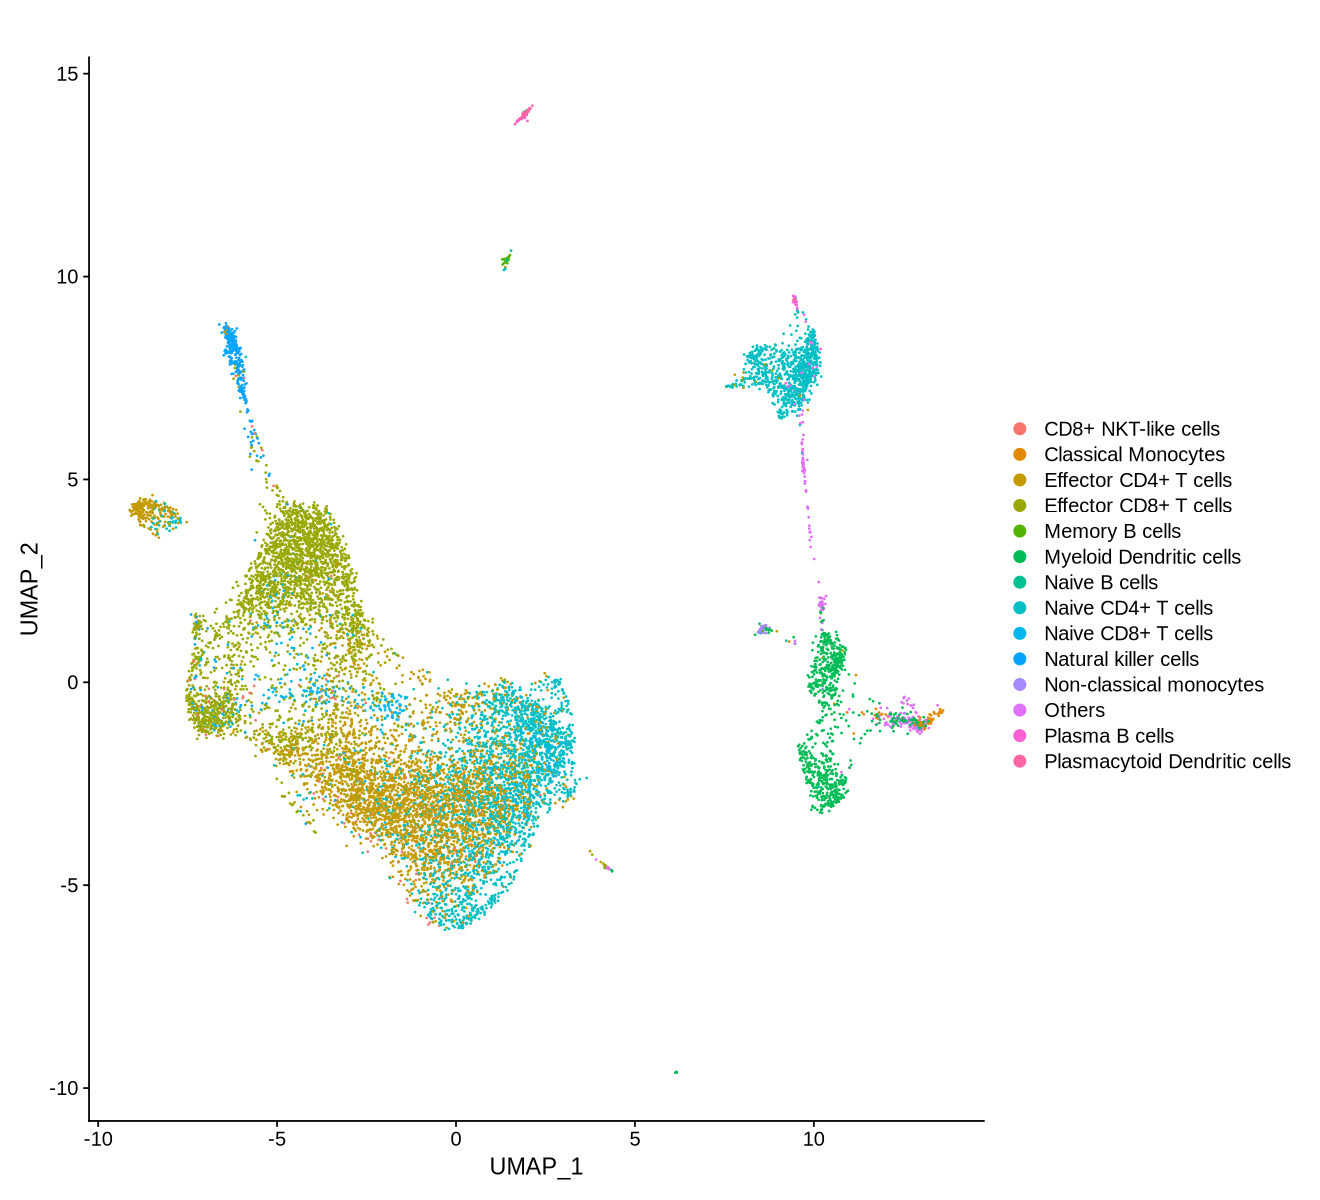

In [4]:
data <- r('230703_rand_csf')
width=10
height=10
fs(width,height)

#data@meta.data <- data@meta.data %>% mutate(celltype = case_when(
#    celltype == 'Naive CD4+ T cells' ~ 'Effector CD4+ T cells',
#    TRUE ~ celltype
#))

 DimPlot(data, group.by='condition1') + ggtitle("")

 pdf('Fig2.B1.pdf', width=width, height=height)
 DimPlot(data, group.by='condition1') + ggtitle("")
 dev.off()

 width=11
 height=10
 fs(width,height)
 DimPlot(data, group.by='celltype') + ggtitle("")

 pdf('Fig2.B2.pdf', width=width, height=height)
 DimPlot(data, group.by='celltype') + ggtitle("")
 dev.off()

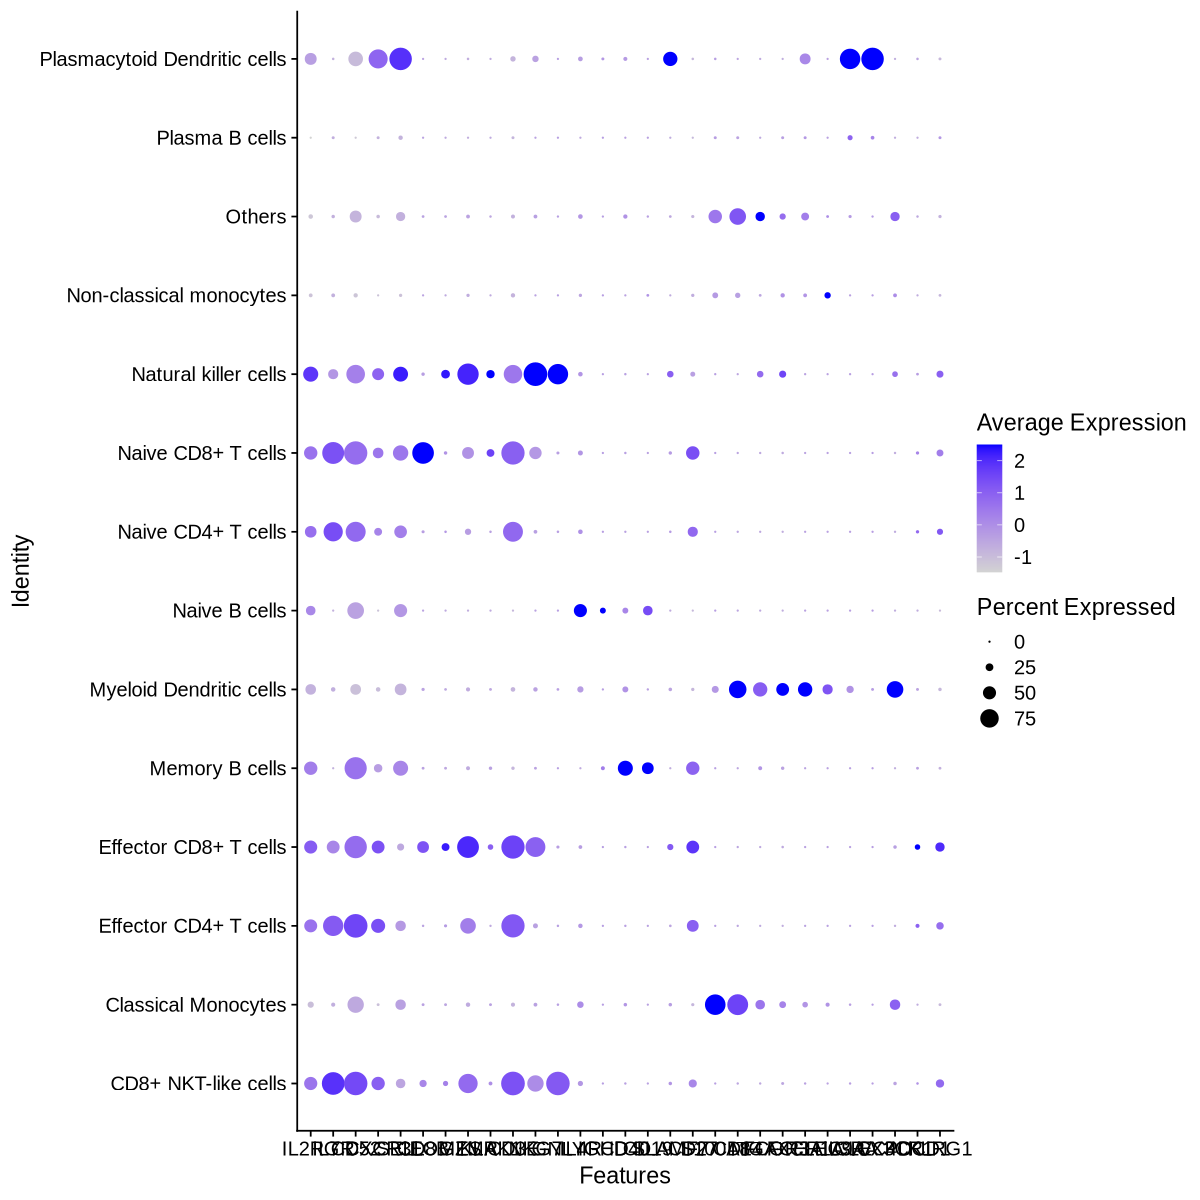

In [5]:
fs()
features <- c('IL2RG', 'IL7R', 'CD52', 'CXCR3', 'SELL', 'CD8B', 'EOMES', 'GZMA', 'KLRK1', 'CD3E', 'NKG7', 'GNLY', 'IL4R', 'IGHD', 'CD40', 'CD19', 'SLAMF7', 'CD27', 'S100A8', 'CD14', 'ITGAX', 'FCGR3A', 'FCER1A', 'CLEC9A', 'IL3RA', 'CLEC4C', 'CX3CR1', 'PDCD1', 'KLRG1')


DotPlot(data,
        features = features,
        group.by = 'celltype'
       )

In [127]:
unique(data@meta.data$celltype)

[1] "Effector CD8+ T cells"        "Effector CD4+ T cells"       
 [3] "CD8+ NKT-like cells"          "Myeloid Dendritic cells"     
 [5] "Natural killer cells"         "Naive CD8+ T cells"          
 [7] "Others"                       "Non-classical monocytes"     
 [9] "Plasmacytoid Dendritic cells" "Memory B cells"              
[11] "Classical Monocytes"          "Plasma B cells"              
[13] "Naive B cells"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

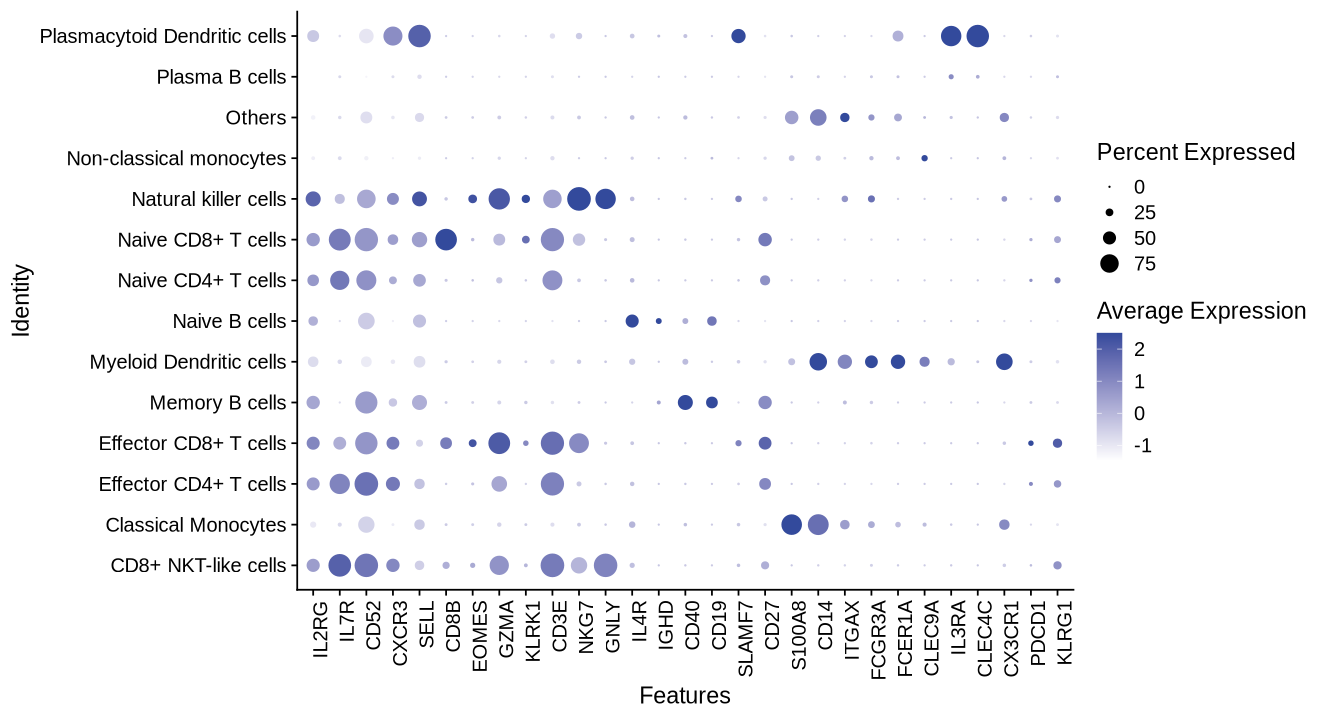

In [6]:
width=11
height=6
fs(width,height)
features <- c('IL2RG', 'IL7R', 'CD52', 'CXCR3', 'SELL', 'CD8B', 'EOMES', 'GZMA', 'KLRK1', 'CD3E', 'NKG7', 'GNLY', 'IL4R', 'IGHD', 'CD40', 'CD19', 'SLAMF7', 'CD27', 'S100A8', 'CD14', 'ITGAX', 'FCGR3A', 'FCER1A', 'CLEC9A', 'IL3RA', 'CLEC4C', 'CX3CR1', 'PDCD1', 'KLRG1')


p <- DotPlot(data,
        features = features,
        group.by = 'celltype'
       ) + theme(axis.text.x = element_text(angle = 90, hjust=1)) +
        scale_color_gradientn(colours = c("white", "#334A9C"))
p

pdf('Fig2.C.pdf', width=width, height=height)
p
dev.off()


In [ ]:
data <- r('230309_rand_all')
subset(data, subset = condition1 != 'PBMC') -> csf
csf@meta.data <- csf@meta.data %>% mutate(celltype = case_when(
    celltype == 'Naive CD4+ T cells' ~ 'Effector CD4+ T cells',
    TRUE ~ celltype
))

 Idents(csf) <- 'condition1'
 SplitObject(csf, split.by='celltype') -> csf_list
 map(csf_list, FindAllMarkers) -> markers_list
 markers_list -> markers_list2
 markers_list2$`Natural killer cells` <- NULL
 markers_list2$Unknown <- NULL
 markers_list2$`Non-classical monocytes` <- NULL
 markers_list2$`Plasmacytoid Dendritic cells` <- NULL
 markers_list2$`Memory B cells` <- NULL
 markers_list2$`Naive B cells` <- NULL
 markers_list2$Platelets <- NULL
 markers_list2$`Classical Monocytes` <- NULL
 markers_list2$`Plasma B cells` <- NULL
 markers_list2$`Progenitor cells` <- NULL
 markers_list2$`CD8+ NKT-like cells` <- NULL
 goenrich <- function(x){
     x %>% dplyr::filter(cluster == 'CSF' & p_val_adj < 0.1 & avg_log2FC > 1) %>% .$gene -> up
     return(up)
 }
 map(markers_list2, goenrich) -> up_list
 mycompareGO(up_list) -> results

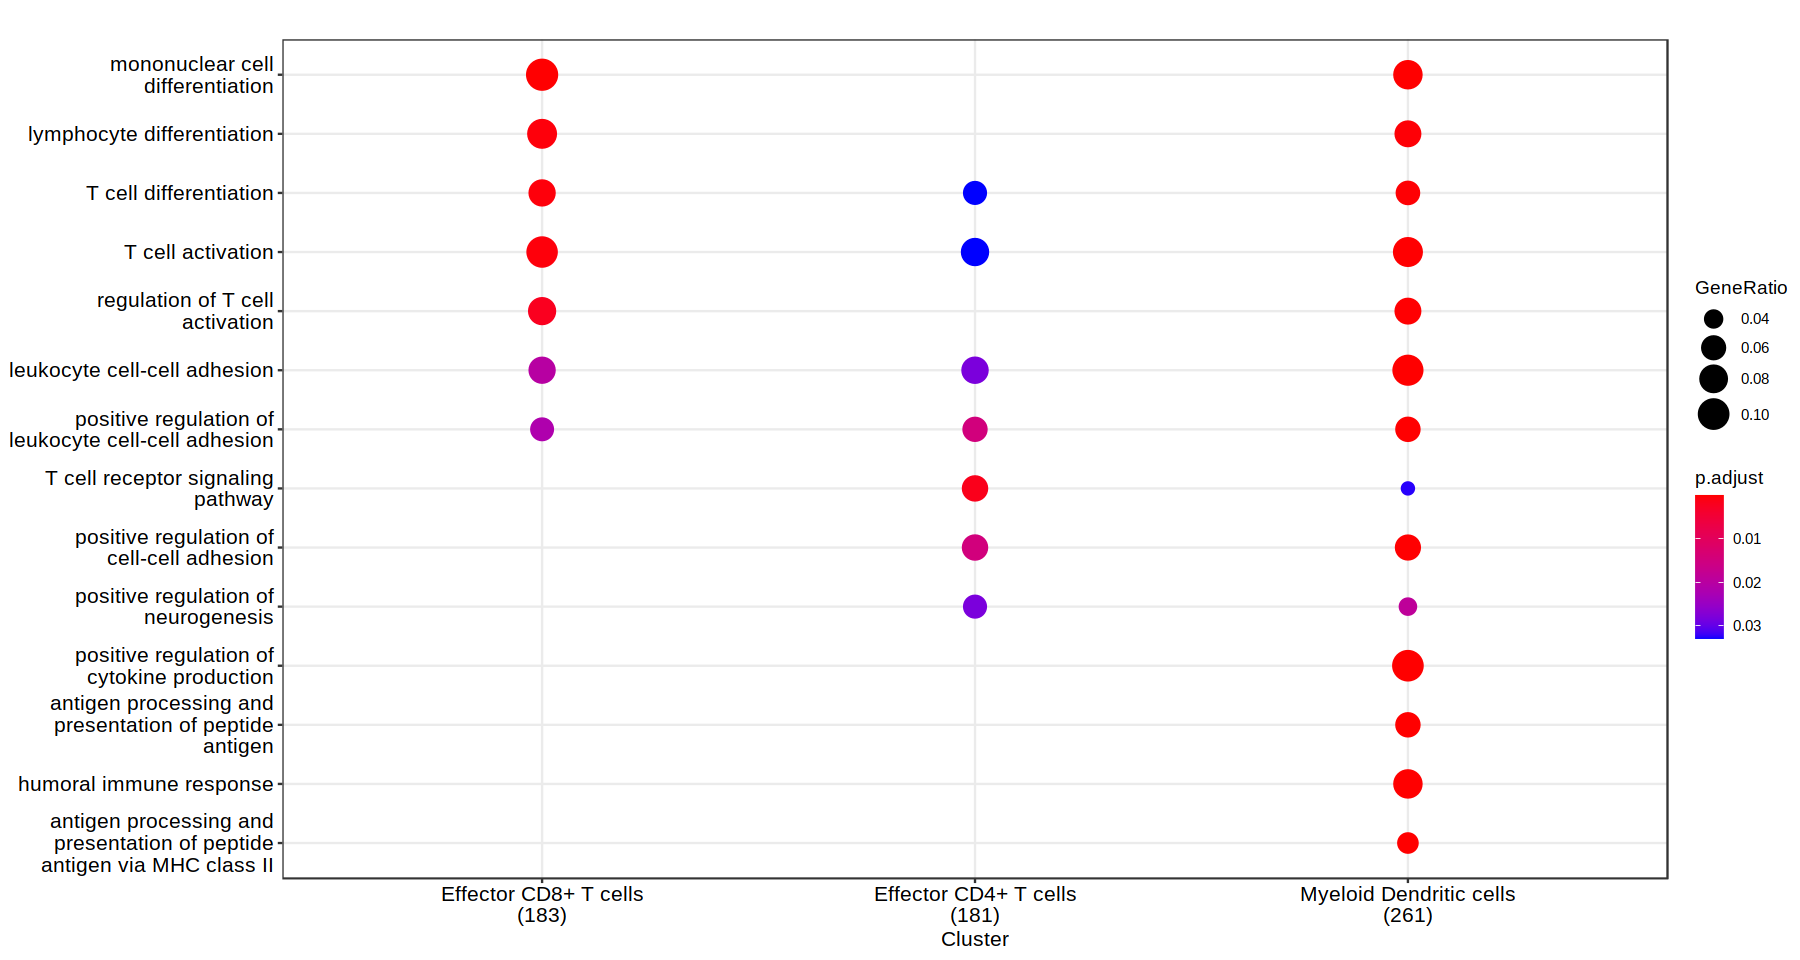

In [95]:
dotplot(results[[1]])

In [89]:
write.csv(results[[1]], 'txt/231102_rand_gobp.csv')

In [90]:
csv <- read.csv('txt/231102_rand_gobp.csv')

png 
  2

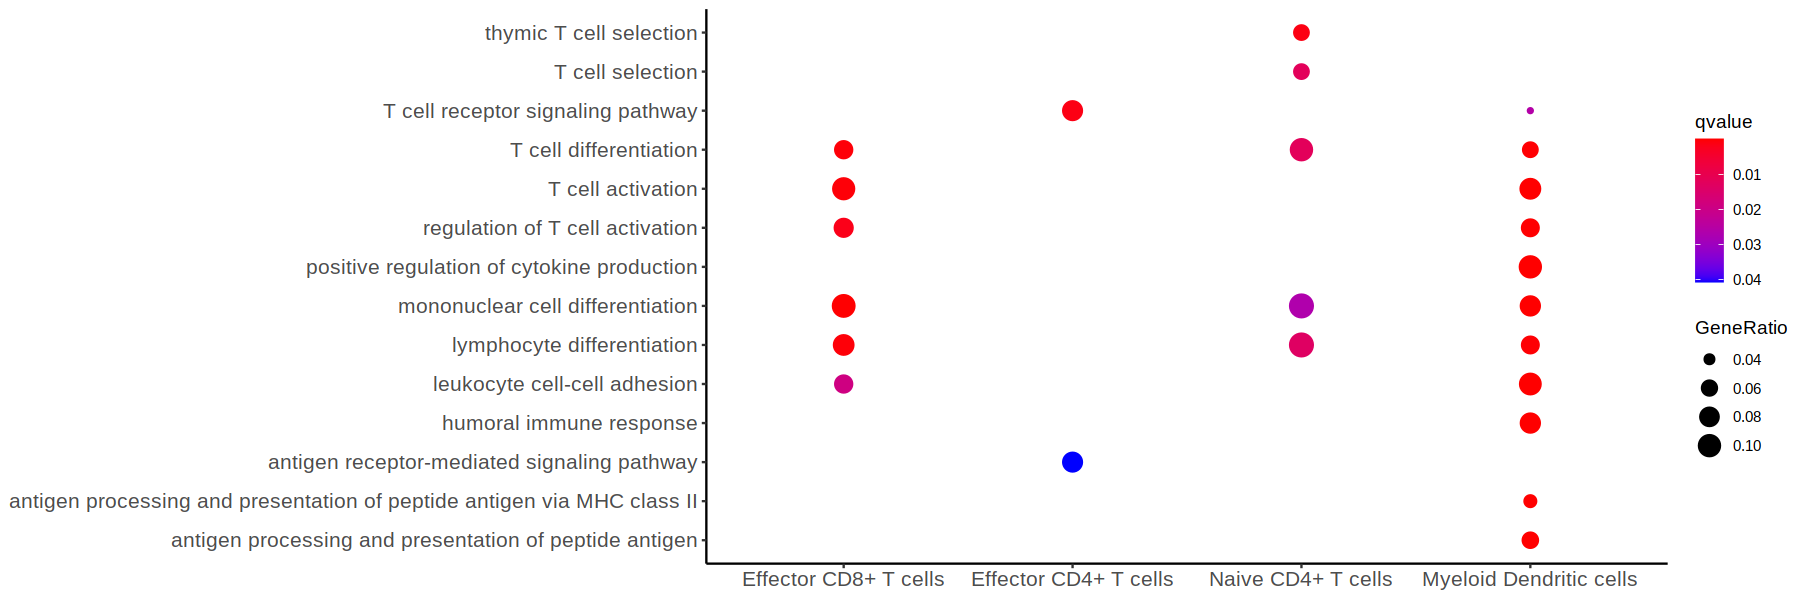

In [124]:
csv %>% group_by(Cluster) %>% slice_head(n = 5) -> csv2
lists <- unique(csv2$Description)
csv3 <- csv %>% dplyr::filter(Description %in% lists)
csv4 <- transform(csv3, Cluster = factor(Cluster, levels = c("Effector CD8+ T cells", "Effector CD4+ T cells", "Naive CD4+ T cells", "Myeloid Dendritic cells")))
width = 15
height = 5
fs(width,height)

g <- ggplot(csv4) + 
geom_point(aes(x = Cluster, y = Description, size= GeneRatio, color = qvalue)) + 
theme_classic() + 
scale_color_gradient(low = 'red', high = 'blue') + guides(colour = guide_colourbar(reverse = TRUE)) +
theme(axis.text.y = element_text(size=12), axis.text.x = element_text(size=12), axis.title = element_blank())
g

pdf('Fig2.E.pdf', width=width, height=height)
g
dev.off()


In [117]:
csv4$GeneRatio

[1] 0.10382514 0.08743169 0.07103825 0.09836066 0.07650273 0.07103825
 [7] 0.05714286 0.05714286 0.10000000 0.11428571 0.11428571 0.08264463
[13] 0.08264463 0.09578544 0.09961686 0.06130268 0.08429119 0.04597701
[19] 0.08429119 0.08812261 0.06896552 0.05747126 0.06896552 0.03448276

In [118]:
csv4

X   Cluster                 ID        
1    1 Effector CD8+ T cells   GO:1903131
2    2 Effector CD8+ T cells   GO:0030098
3    3 Effector CD8+ T cells   GO:0030217
4    4 Effector CD8+ T cells   GO:0042110
5    5 Effector CD8+ T cells   GO:0050863
6    8 Effector CD8+ T cells   GO:0007159
7   19 Naive CD4+ T cells      GO:0045061
8   20 Naive CD4+ T cells      GO:0045058
9   21 Naive CD4+ T cells      GO:0030217
10  22 Naive CD4+ T cells      GO:0030098
11  23 Naive CD4+ T cells      GO:1903131
12  25 Effector CD4+ T cells   GO:0050852
13  26 Effector CD4+ T cells   GO:0050851
14  27 Myeloid Dendritic cells GO:0007159
15  28 Myeloid Dendritic cells GO:0001819
16  29 Myeloid Dendritic cells GO:0048002
17  30 Myeloid Dendritic cells GO:0006959
18  31 Myeloid Dendritic cells GO:0002495
19  37 Myeloid Dendritic cells GO:1903131
20  44 Myeloid Dendritic cells GO:0042110
21  50 Myeloid Dendritic cells GO:0050863
22  55 Myeloid Dendritic cells GO:0030217
23  57 Myeloid Dendritic cells GO:0030098
24 271 Myeloid Dendritic cells GO:0050852
   Description                                                             gene
1  mononuclear cell differentiation                                        19  
2  lymphocyte differentiation                                              16  
3  T cell differentiation                                                  13  
4  T cell activation                                                       18  
5  regulation of T cell activation                                         14  
6  leukocyte cell-cell adhesion                                            13  
7  thymic T cell selection                                                  4  
8  T cell selection                                                         4  
9  T cell differentiation                                                   7  
10 lymphocyte differentiation                                               8  
11 mononuclear cell differentiation                                         8  
12 T cell receptor signaling pathway                                       10  
13 antigen receptor-mediated signaling pathway                             10  
14 leukocyte cell-cell adhesion                                            25  
15 positive regulation of cytokine production                              26  
16 antigen processing and presentation of peptide antigen                  16  
17 humoral immune response                                                 22  
18 antigen processing and presentation of peptide antigen via MHC class II 12  
19 mononuclear cell differentiation                                        22  
20 T cell activation                                                       23  
21 regulation of T cell activation                                         18  
22 T cell differentiation                                                  15  
23 lymphocyte differentiation                                              18  
24 T cell receptor signaling pathway                                        9  
   ratio GeneRatio  GeneRatio2 BgRatio   pvalue       p.adjust     qvalue      
1  183   0.10382514 19/183     411/18862 2.030000e-08 0.0000532000 0.0000500000
2  183   0.08743169 16/183     358/18862 4.420000e-07 0.0005798702 0.0005445337
3  183   0.07103825 13/183     246/18862 8.670000e-07 0.0005830504 0.0005475201
4  183   0.09836066 18/183     474/18862 8.890000e-07 0.0005830504 0.0005475201
5  183   0.07650273 14/183     327/18862 3.920000e-06 0.0020585061 0.0019330635
6  183   0.07103825 13/183     366/18862 6.160000e-05 0.0202020379 0.0189709528
7   70   0.05714286 4/70       22/18862  1.210000e-06 0.0013849478 0.0012362990
8   70   0.05714286 4/70       48/18862  2.990000e-05 0.0133997604 0.0119615421
9   70   0.10000000 7/70       246/18862 3.510000e-05 0.0133997604 0.0119615421
10  70   0.11428571 8/70       358/18862 5.270000e-05 0.0150981726 0.0134776608
11  70   0.11428571 8/70       411/18862 1.376396e-04 0.0297829394 0.0265

In [ ]:
source('Rscript/mycompareGO.r')
goenrich <- function(x){
    x %>% dplyr::filter(cluster == 'CSF' & p_val_adj < 0.1 & avg_log2FC > 1) %>% .$gene -> up
    return(up)
}
map(markers_list, goenrich) -> up_list

mycompareGO(up_list) -> results
dotplot(results[[1]])

png 
  2

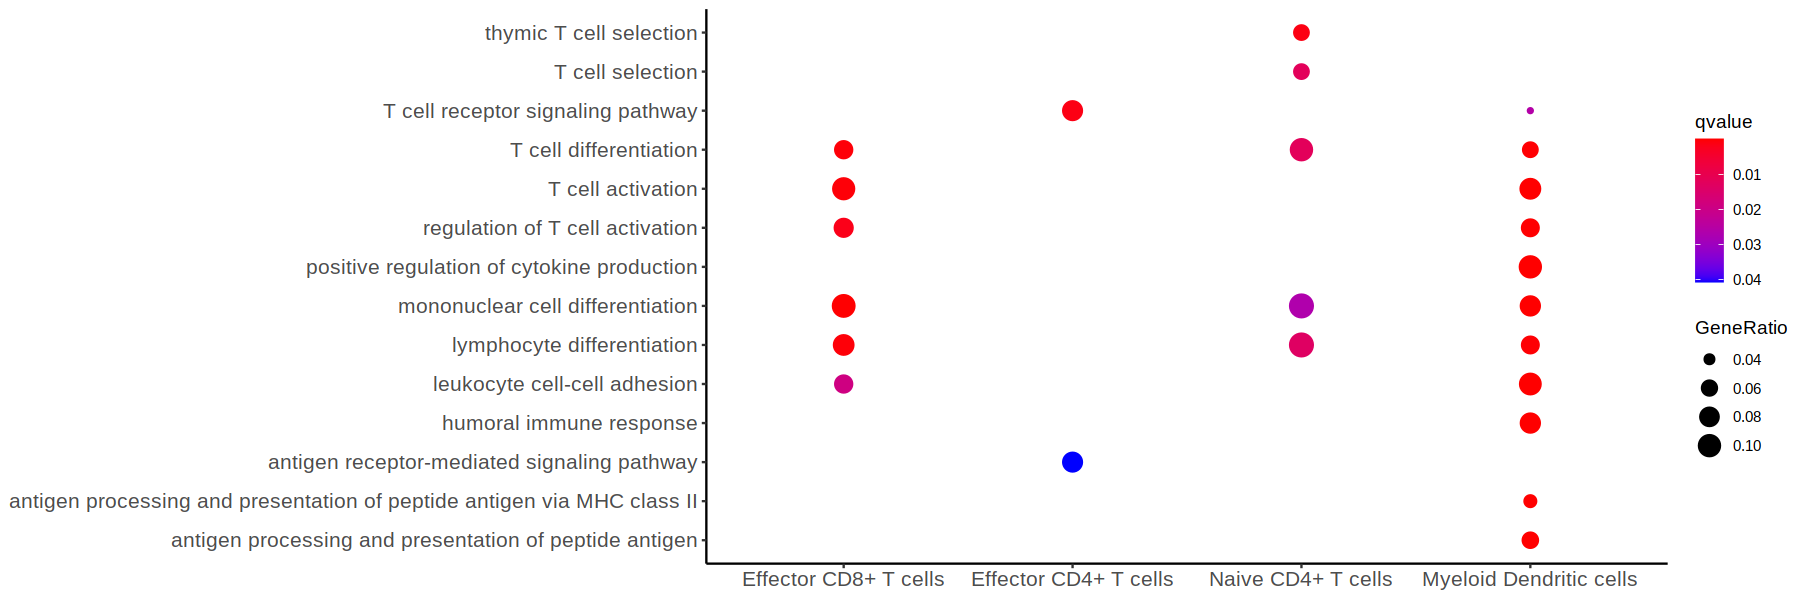

In [107]:
width = 15
height = 5
csv <- read.csv('txt/230703_rand_goenrich_csf_vs_pubcsf_per_subset - 230327_rand_goenrich_csf_vs_pubcsf_per_subset.csv')
csv %>% group_by(Cluster) %>% slice_head(n = 5) -> csv2
lists <- unique(csv2$Description)
csv3 <- csv %>% dplyr::filter(Description %in% lists)
csv4 <- transform(csv3, Cluster = factor(Cluster, levels = c("Effector CD8+ T cells", "Effector CD4+ T cells", "Naive CD4+ T cells", "Myeloid Dendritic cells")))
fs(width,height)
g <- ggplot(csv4) + 
geom_point(aes(x = Cluster, y = Description, size= GeneRatio, color = qvalue)) + 
theme_classic() + 
scale_color_gradient(low = 'red', high = 'blue') + guides(colour = guide_colourbar(reverse = TRUE)) +
theme(axis.text.y = element_text(size=12), axis.text.x = element_text(size=12), axis.title = element_blank())
g

pdf('Fig2.4.pdf', width=width, height=height)
g
dev.off()

In [108]:
csv4

X   Cluster                 ID        
1    1 Effector CD8+ T cells   GO:1903131
2    2 Effector CD8+ T cells   GO:0030098
3    3 Effector CD8+ T cells   GO:0030217
4    4 Effector CD8+ T cells   GO:0042110
5    5 Effector CD8+ T cells   GO:0050863
6    8 Effector CD8+ T cells   GO:0007159
7   19 Naive CD4+ T cells      GO:0045061
8   20 Naive CD4+ T cells      GO:0045058
9   21 Naive CD4+ T cells      GO:0030217
10  22 Naive CD4+ T cells      GO:0030098
11  23 Naive CD4+ T cells      GO:1903131
12  25 Effector CD4+ T cells   GO:0050852
13  26 Effector CD4+ T cells   GO:0050851
14  27 Myeloid Dendritic cells GO:0007159
15  28 Myeloid Dendritic cells GO:0001819
16  29 Myeloid Dendritic cells GO:0048002
17  30 Myeloid Dendritic cells GO:0006959
18  31 Myeloid Dendritic cells GO:0002495
19  37 Myeloid Dendritic cells GO:1903131
20  44 Myeloid Dendritic cells GO:0042110
21  50 Myeloid Dendritic cells GO:0050863
22  55 Myeloid Dendritic cells GO:0030217
23  57 Myeloid Dendritic cells GO:0030098
24 271 Myeloid Dendritic cells GO:0050852
   Description                                                             gene
1  mononuclear cell differentiation                                        19  
2  lymphocyte differentiation                                              16  
3  T cell differentiation                                                  13  
4  T cell activation                                                       18  
5  regulation of T cell activation                                         14  
6  leukocyte cell-cell adhesion                                            13  
7  thymic T cell selection                                                  4  
8  T cell selection                                                         4  
9  T cell differentiation                                                   7  
10 lymphocyte differentiation                                               8  
11 mononuclear cell differentiation                                         8  
12 T cell receptor signaling pathway                                       10  
13 antigen receptor-mediated signaling pathway                             10  
14 leukocyte cell-cell adhesion                                            25  
15 positive regulation of cytokine production                              26  
16 antigen processing and presentation of peptide antigen                  16  
17 humoral immune response                                                 22  
18 antigen processing and presentation of peptide antigen via MHC class II 12  
19 mononuclear cell differentiation                                        22  
20 T cell activation                                                       23  
21 regulation of T cell activation                                         18  
22 T cell differentiation                                                  15  
23 lymphocyte differentiation                                              18  
24 T cell receptor signaling pathway                                        9  
   ratio GeneRatio  GeneRatio2 BgRatio   pvalue       p.adjust     qvalue      
1  183   0.10382514 19/183     411/18862 2.030000e-08 0.0000532000 0.0000500000
2  183   0.08743169 16/183     358/18862 4.420000e-07 0.0005798702 0.0005445337
3  183   0.07103825 13/183     246/18862 8.670000e-07 0.0005830504 0.0005475201
4  183   0.09836066 18/183     474/18862 8.890000e-07 0.0005830504 0.0005475201
5  183   0.07650273 14/183     327/18862 3.920000e-06 0.0020585061 0.0019330635
6  183   0.07103825 13/183     366/18862 6.160000e-05 0.0202020379 0.0189709528
7   70   0.05714286 4/70       22/18862  1.210000e-06 0.0013849478 0.0012362990
8   70   0.05714286 4/70       48/18862  2.990000e-05 0.0133997604 0.0119615421
9   70   0.10000000 7/70       246/18862 3.510000e-05 0.0133997604 0.0119615421
10  70   0.11428571 8/70       358/18862 5.270000e-05 0.0150981726 0.0134776608
11  70   0.11428571 8/70       411/18862 1.376396e-04 0.0297829394 0.0265

# Fig. S4

In [23]:
library(ggrepel)
csf <- r("220920_rand_our_public_csf_normalized_marker")
csf <- csf %>% dplyr::filter(cluster == 'our')

# T cell activation gene
csv <- read.csv('txt/230323_rand_goenrichment_csf_vs_publiccsf.csv')
csv[1,'geneID'] -> T_cell_activation_gene
str_split(T_cell_activation_gene, '/') -> T_cell_activation_gene
as.data.frame(T_cell_activation_gene)[,1] -> T_cell_activation_gene
source('Rscript/convert_geneID.r')
convert_geneID(T_cell_activation_gene, 'ENTREZID', 'SYMBOL')$SYMBOL -> T_cell_activation_symbol


#diffexpressedというカラムを作り、NOとかく
csf$diffexpressed<-"NO"


#このうち、m.valueが>1かつq value が0.1以下のものをUPにする
csf$diffexpressed[csf$avg_log2FC > 0 & csf$p_val_adj < 0.1] <-"UP"
#このうち、m.valueが＜1かつq value が0.1以下のものをUPにする
csf$diffexpressed[csf$avg_log2FC < 0 & csf$p_val_adj < 0.1] <-"DOWN"


#delabelというカラムを作り、NAとする
csf$delabel<-NA

csf <- csf %>% mutate(delabel = case_when(
    gene %in% T_cell_activation_symbol ~ gene,
))

csf <- csf %>% mutate(newlabel = case_when( 
                        !is.na(delabel) & -log10(p_val_adj) > 100 ~ delabel))
csf <- csf %>% mutate(diffexpressed = case_when(
    is.na(newlabel) ~ 'black',
    !is.na(newlabel) ~ 'red'
))

csf <- csf %>% mutate(log_p_val_adj = case_when(
    -log10(p_val_adj) > 300 ~ 300,
    TRUE ~ -log10(p_val_adj)  
))

#volcanoplotを作る。 dataはデータ、xはlog2folc, yはqvalueの-log10, 
width = 10
height = 10

fs(width,height)

options(ggrepel.max.overlaps = Inf)


p <- ggplot(data = csf, aes(x = avg_log2FC, y = log_p_val_adj, col = diffexpressed, label = newlabel)) + geom_point() + theme_minimal() + 
        geom_text_repel() + scale_color_manual(values = c("black", "red")) + theme(legend.position = "none")
pdf('FigS4.pdf', width=width, height=height)
p
dev.off()

'select()' returned 1:1 mapping between keys and columns

Warning message:
“Removed 1373 rows containing missing values (`geom_text_repel()`).”


png 
  2

In [17]:
csf <- csf %>% mutate(log_p_val_adj = case_when(
    -log10(p_val_adj) > 300 ~ 300,
    TRUE ~ -log10(p_val_adj)  
))

In [ ]:
csf

png 
  2

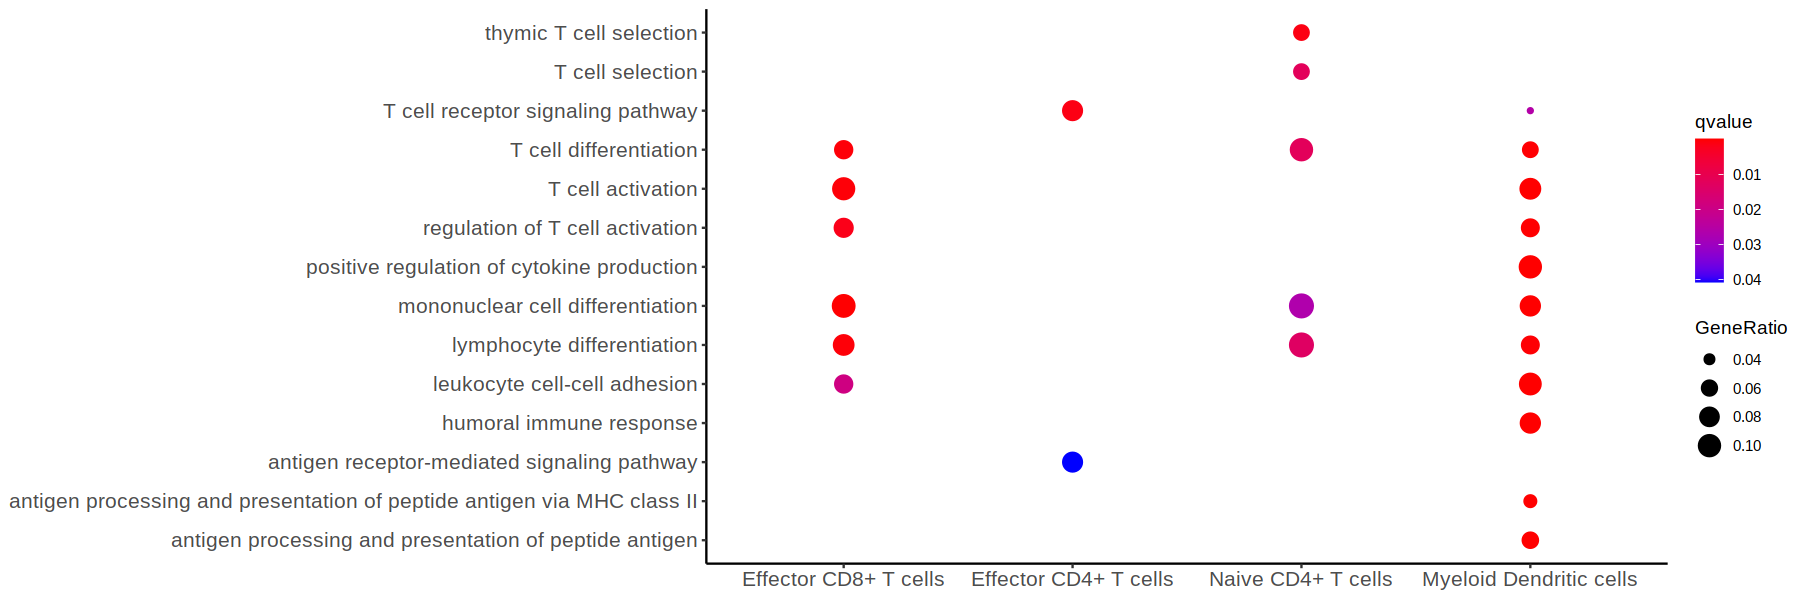

In [4]:
width = 15
height = 5
csv <- read.csv('txt/230703_rand_goenrich_csf_vs_pubcsf_per_subset - 230327_rand_goenrich_csf_vs_pubcsf_per_subset.csv')
csv %>% group_by(Cluster) %>% slice_head(n = 5) -> csv2
lists <- unique(csv2$Description)
csv3 <- csv %>% dplyr::filter(Description %in% lists)
csv4 <- transform(csv3, Cluster = factor(Cluster, levels = c("Effector CD8+ T cells", "Effector CD4+ T cells", "Naive CD4+ T cells", "Myeloid Dendritic cells")))
fs(width,height)
g <- ggplot(csv4) + 
geom_point(aes(x = Cluster, y = Description, size= GeneRatio, color = qvalue)) + 
theme_classic() + 
scale_color_gradient(low = 'red', high = 'blue') + guides(colour = guide_colourbar(reverse = TRUE)) +
theme(axis.text.y = element_text(size=12), axis.text.x = element_text(size=12), axis.title = element_blank())
g

pdf('Fig2.4.pdf', width=width, height=height)
g
dev.off()

# Fig.3

In [3]:
source('Rscript/rprofile.r')
data <- r('230707_rand_T_normalized')

data@meta.data <- data@meta.data %>% mutate(celltype = case_when(
    celltype == 'Naive CD4+ T cells' ~ 'Effector CD4+ T cells',
    TRUE ~cd8_d <- cd8 %>% distinct(CTaa.x, .keep_all = TRUE)
table(cd8_d$common_T) celltype
))

Idents(data) <- 'common_T'
common_T <- WhichCells(data, idents = c("TRUE"))
p3 <- DimPlot(data, group.by="common_T", cells.highlight = common_T, cols.highlight = "red", cols = "grey", sizes.highlight = 0.1) + NoLegend() + labs(title = "")
#p3 <- DimPlot(data, group.by="common_T", cells.highlight = common_T, cols.highlight = "red", cols = "grey", sizes.highlight = 0.1) + #p3 <- DimPlot(data, group.by="common_T", cells.highlight = common_T, cols.highlight = "red", cols = "grey", sizes.highlight = 0.1) + NoLegend() + labs(title = "")
#  theme(legend.position = "bottom") + labs(title = "")

p1 <- DimPlot(data, group.by='condition1', cols = c('CSF' = '#E41A1C', 'PBMC' = '#377EB8')) + labs(title = "") + NoLegend()

fs(width,height)
p2 <- DimPlot(data, group.by='celltype') + labs(title = "") + NoLegend()
#p2 <- DimPlot(data, group.by='celltype') + labs(title = "") + theme(legend.position = "bottom") 

width = 12
height = 6.5
fs(width, height)
p2 + p3

pdf('Fig3B.pdf', width=width, height=height)
p2 + p3
dev.off()

width = 16
height = 6.5
fs(width, height)

p1 + p2 + p3
pdf('Fig3B-2.pdf', width=width, height=height)
p1 + p2 + p3
dev.off()

width = 12
height = 6.5
fs(width, height)
p1 <- DimPlot(data, group.by='condition1', cols = c('CSF' = '#E41A1C', 'PBMC' = '#377EB8')) + labs(title = "")
p2 <- DimPlot(data, group.by='celltype') + labs(title = "")
p3 <- DimPlot(data, group.by="common_T", cells.highlight = common_T, cols.highlight = "red", cols = "grey", sizes.highlight = 0.1) + labs(title = "")
p2 + p3
pdf('Fig3B(Legendつき).pdf', width=width, height=height)
p2 + p3
dev.off()

width = 16
height = 6.5
fs(width, height)

p1 + p2 + p3
pdf('Fig3B-2(Legendつき).pdf', width=width, height=height)
p1 + p2 + p3
dev.off()



ERROR: Error in parse(text = x, srcfile = src): <text>:7:1: unexpected symbol
6:     TRUE ~cd8_d <- cd8 %>% distinct(CTaa.x, .keep_all = TRUE)
7: table
   ^


# Fig.3C

In [4]:
source('Rscript/rprofile.r')
data <- r('230707_rand_T_normalized')
meta <- data@meta.data %>% dplyr::filter(number_of_tcr_per_sample >= 2)
meta <- meta %>% dplyr::filter(condition1 == 'CSF')
cd8 <- meta %>% dplyr::filter(celltype == 'Effector CD8+ T cells')
cd4 <- meta %>% dplyr::filter(celltype == 'Effector CD4+ T cells')
cd8_d <- cd8 %>% distinct(CTaa.x, .keep_all = TRUE)
table(cd8_d$common_T)
cd4_d <- cd4 %>% distinct(CTaa.x, .keep_all = TRUE)
table(cd4_d$common_T)



FALSE  TRUE 
   12    18 


FALSE  TRUE 
    7     1 

In [10]:
meta <- data@meta.data %>% dplyr::filter(condition1 == 'CSF')
cd8 <- meta %>% dplyr::filter(celltype == 'Effector CD8+ T cells')
length(unique(cd8$CTaa.x))

[1] 132

In [14]:
expand_cd8 <- cd8 %>% dplyr::filter(number_of_tcr_per_sample >= 2)

In [18]:
length(unique(expand_cd8$CTaa.x))

[1] 30

In [22]:
ce8 <- expand_cd8 %>% dplyr::filter(common_T == 'TRUE')
length(unique(ce8$CTaa.x))

[1] 18

In [26]:
data@meta.data <- data@meta.data %>% mutate(celltype = case_when(
    celltype == 'Naive CD4+ T cells' ~ 'Effector CD4+ T cells',
    TRUE ~ celltype))
unique(data@meta.data$celltype)                                    
                                            


[1] "Naive CD8+ T cells"    "Effector CD8+ T cells" "Effector CD4+ T cells"
[4] "CD8+ NKT-like cells"

In [28]:
meta <- data@meta.data %>% dplyr::filter(condition1 == 'CSF')
cd4 <- meta %>% dplyr::filter(celltype == 'Effector CD4+ T cells')
expand_cd4 <- cd4 %>% dplyr::filter(number_of_tcr_per_sample >= 2)
length(unique(expand_cd4$CTaa.x))

ce4 <- expand_cd4 %>% dplyr::filter(common_T == 'TRUE')
length(unique(ce4$CTaa.x))

[1] 11

[1] 4

In [ ]:
meta <- data@meta.data %>% dplyr::filter(condition1 == 'CSF')
cd8 <- meta %>% dplyr::filter(celltype == 'Effector CD8+ T cells')
length(unique(cd8$CTaa.x))

In [29]:
source('Rscript/rprofile.r')
data <- r('230707_rand_T_normalized')
meta <- data@meta.data %>% mutate(celltype = case_when(
    celltype == 'Naive CD4+ T cells' ~ 'Effector CD4+ T cells',
    TRUE ~ celltype))


#meta <- data@meta.data %>% dplyr::filter(number_of_tcr_per_sample >= 2)
#meta <- meta %>% dplyr::filter(condition1 == 'CSF')
#cd8 <- meta %>% dplyr::filter(celltype == 'Effector CD8+ T cells')
#cd4 <- meta %>% dplyr::filter(celltype == 'Effector CD4+ T cells')
#cd8_d <- cd8 %>% distinct(CTaa.x, .keep_all = TRUE)
#table(cd8_d$common_T)
#cd4_d <- cd4 %>% distinct(CTaa.x, .keep_all = TRUE)
#table(cd4_d$common_T)


In [35]:
cd8_pbmc_clonotype <- meta %>% dplyr::filter(condition1 == 'PBMC' & celltype == 'Effector CD8+ T cells') %>% .$CTaa.x %>% unique(.)
cd4_pbmc_clonotype <- meta %>% dplyr::filter(condition1 == 'PBMC' & celltype == 'Effector CD4+ T cells') %>% .$CTaa.x %>% unique(.)

In [39]:
cd8_csf_clonotype <- meta %>% dplyr::filter(condition1 == 'CSF' & celltype == 'Effector CD8+ T cells' & number_of_tcr_per_sample >= 2) %>% .$CTaa.x %>% unique(.)
cd4_csf_clonotype <- meta %>% dplyr::filter(condition1 == 'CSF' & celltype == 'Effector CD4+ T cells' & number_of_tcr_per_sample >= 2) %>% .$CTaa.x %>% unique(.)

In [45]:
length(cd8_csf_clonotype)
length(intersect(cd8_pbmc_clonotype, cd8_csf_clonotype))

length(cd4_csf_clonotype)
length(intersect(cd4_pbmc_clonotype, cd4_csf_clonotype))


[1] 30

[1] 16

[1] 11

[1] 1

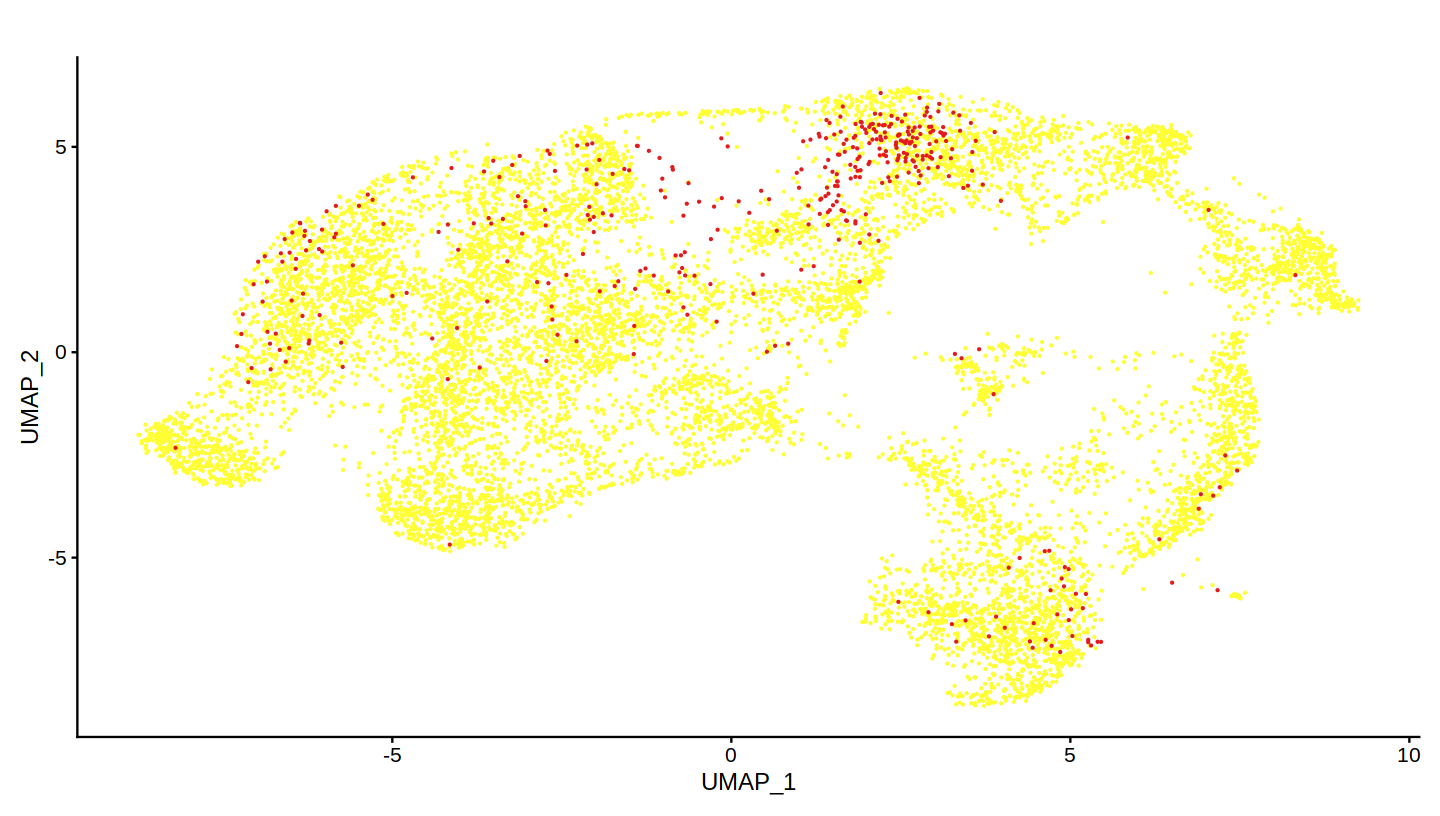

In [4]:
DimPlot(data, group.by='condition1', cols = c('CSF' = '#E41A1C', 'PBMC' = '#FFFF33')) + labs(title = "") + NoLegend() 

In [27]:
brewer.pal(7, "Set1")

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"

In [ ]:
source('Rscript/rprofile.r')
source('Rscript/230103-1singlecell.r')
data <- r('230309_rand_all')
subset(data, subset = condition1 != 'healthy_CSF') -> data
subset(data, subset = celltype == 'Effector CD8+ T cells') -> data
DefaultAssay(data) <- 'RNA'
myseurat_normalize_umap(data) -> data_nromalized

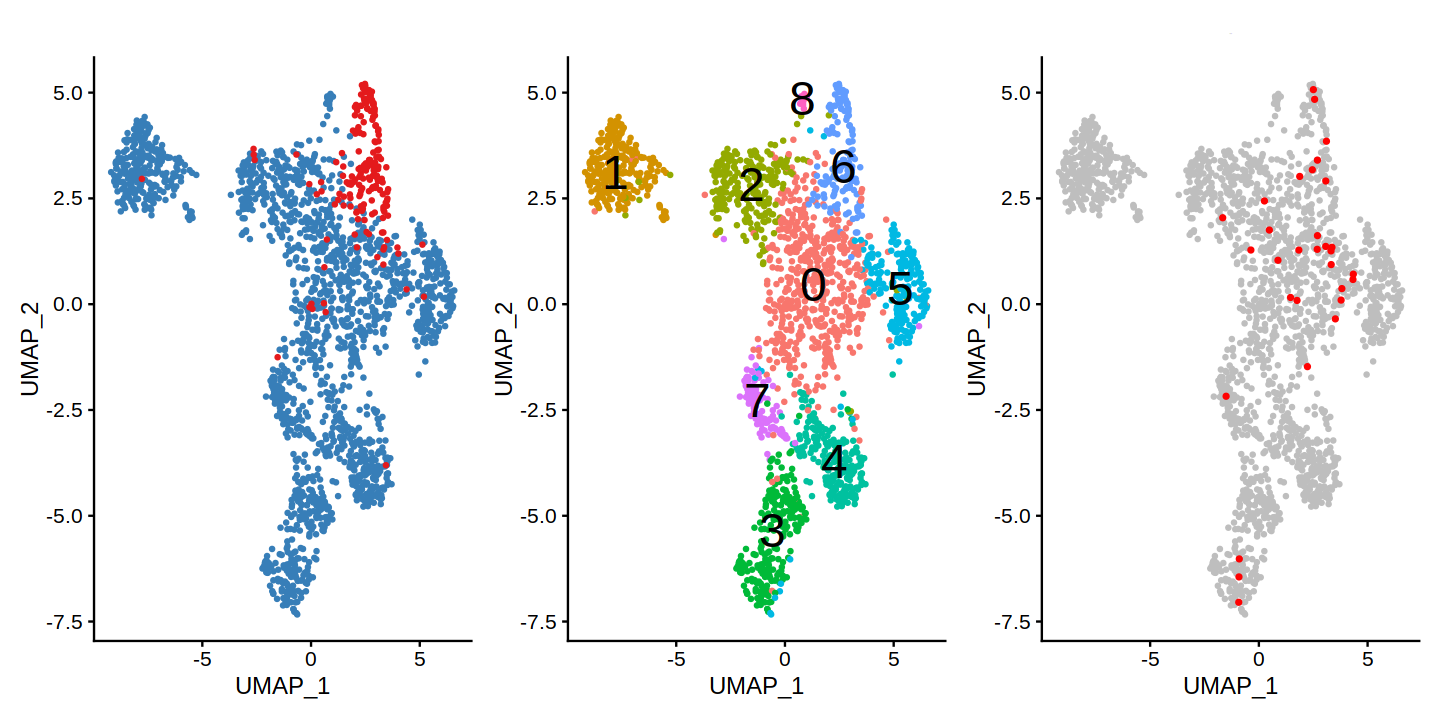

png 
  2

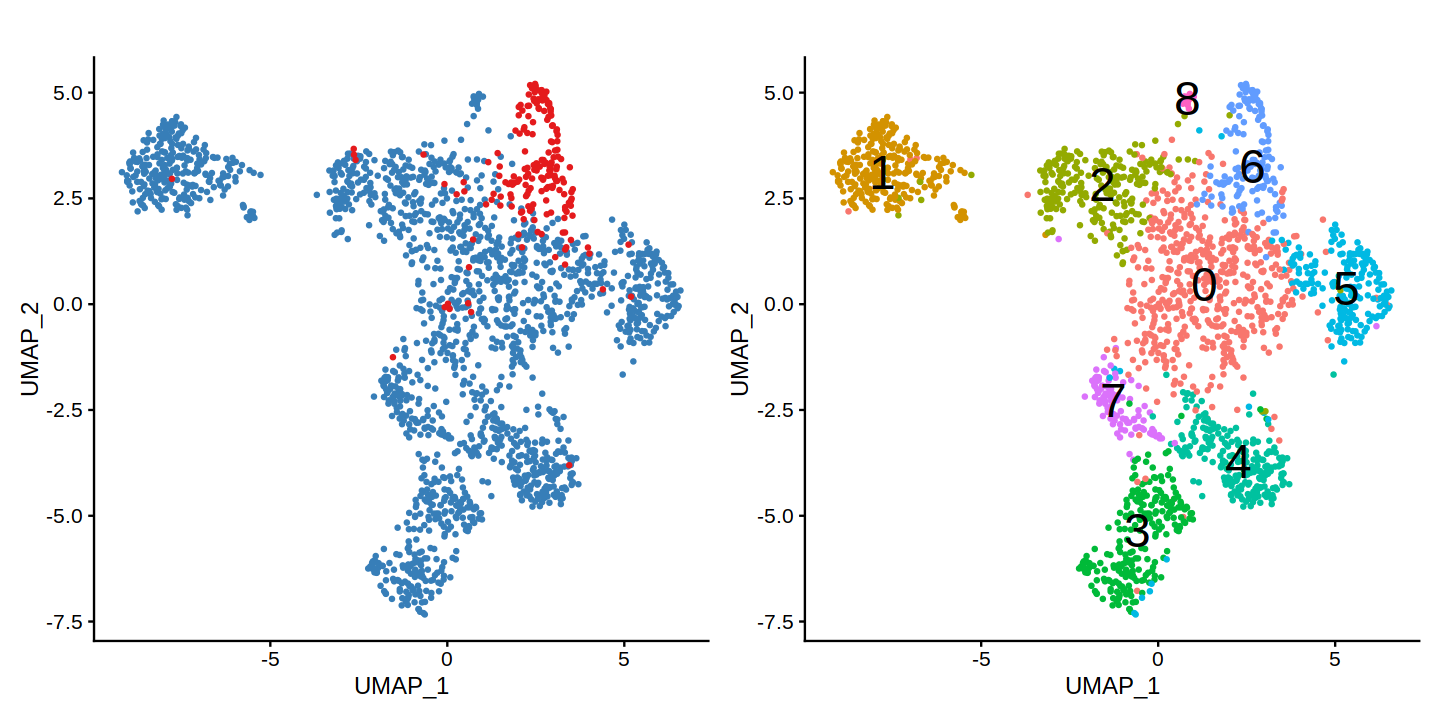

In [2]:
width = 12
height = 6
fs(width, height)
Idents(data_nromalized) <- 'seurat_clusters'

p1 <- DimPlot(data_nromalized, group.by='condition1',  cols = c('CSF' = '#E41A1C', 'PBMC' = '#377EB8')) + NoLegend() + labs(title = "")

p2 <- DimPlot(data_nromalized, label=TRUE, label.size=10) + NoLegend()

data_nromalized@meta.data <- data_nromalized@meta.data %>% mutate(top2 = case_when(
    CTaa.x == 'CLVGGGNKLTF_CSVGGGQDNTEAFF' ~ "TRUE",
    CTaa.x == 'CAAYGNNRLAF_CASTLGTGGSEQYF' ~ "TRUE",

#    CTaa.x == 'CALSDHNYGQNFVF_CASSQGEGNSPLHF' ~ "TRUE",
    TRUE ~ "FALSE"
))

Idents(data_nromalized) <- "top2"
true <- WhichCells(data_nromalized, idents = c("TRUE"))
false <- WhichCells(data_nromalized, idents = c("FALSE"))


p3 <- DimPlot(data_nromalized, group.by="top2", cells.highlight = true, cols.highlight = "red", cols = "grey", sizes.highlight = 1) + NoLegend() + theme(plot.title = element_text(size = 0))

p1 + p2 + p3
p1 + p2
pdf('Fig3.3-2.pdf', width=width, height=height)
p1 + p2 + p3
dev.off()


In [3]:
p3 <- DimPlot(data_nromalized, group.by='top2_x', cols=c('#619CFF', '#FF0000', '#BEBEBE')) + NoLegend()

Idents(data_nromalized) <- "top2"
true <- WhichCells(data_nromalized, idents = c("TRUE"))
false <- WhichCells(data_nromalized, idents = c("FALSE"))


#DimPlot(data_nromalized, group.by="top2_x", cells.highlight = true, cols.highlight = "red", cols = "grey", sizes.highlight = 1) + NoLegend() + theme(plot.title = element_text(size = 0))
DimPlot(data_nromalized, group.by="top2_x", cells.highlight = true, cols=c('#619CFF', '#FF0000', '#BEBEBE'), sizes.highlight = 1) + NoLegend() + theme(plot.title = element_text(size = 0))

p1 + p2 + p3
#BEBEBE gray
#FF0000 red
#619CFF blue

ERROR: Error: Cannot find 'top2_x' in this Seurat object


In [ ]:
data_nromalized@meta.data <- data_nromalized@meta.data %>% mutate(top2_x = case_when(
    CTaa.x == 'CLVGGGNKLTF_CSVGGGQDNTEAFF' ~ CTaa.x,
    CTaa.x == 'CAAYGNNRLAF_CASTLGTGGSEQYF' ~ CTaa.x,

#    CTaa.x == 'CALSDHNYGQNFVF_CASSQGEGNSPLHF' ~ "TRUE",
    TRUE ~ "FALSE"
))

embed <- data_nromalized[["umap"]]@cell.embeddings
embed <- cbind(embed, data_nromalized@meta.data)
embed %>% dplyr::filter(top2 == TRUE) -> tru
embed %>% dplyr::filter(top2 == FALSE) -> fal
embed <- rbind(fal, tru)
p3 <- embed %>% ggplot(aes(x = UMAP_1, y = UMAP_2, color = top2_x)) + 
    geom_point() + 
    theme_classic() + 
    scale_color_manual(values = c('#FF0000', '#619CFF', '#BEBEBE')) + theme(legend.position = 'none')
pdf('Fig3.3-2.pdf', width=width, height=height)
p1 + p2 + p3
dev.off()

p1 + p2 + p3

In [ ]:
 legend.text = element_text(size = input$size_legend_text),
              legend.key.size = unit(input$size_legend_keysize, "points"),
              legend.title = element_text(size = input$size_legend_title),
              axis.title.x = element_text(size = input$size_x_title, angle = input$angle_x_title),
              axis.title.y = element_text(size = input$size_y_title, angle = input$angle_y_title),
              axis.text.x = element_text(angle = input$angle_x_text, size = input$size_x_text),
              axis.text.y = element_text(angle = input$angle_y_text, size = input$size_y_text),
              plot.title = element_text(size = input$size_title, hjust = input$position_title)) #+

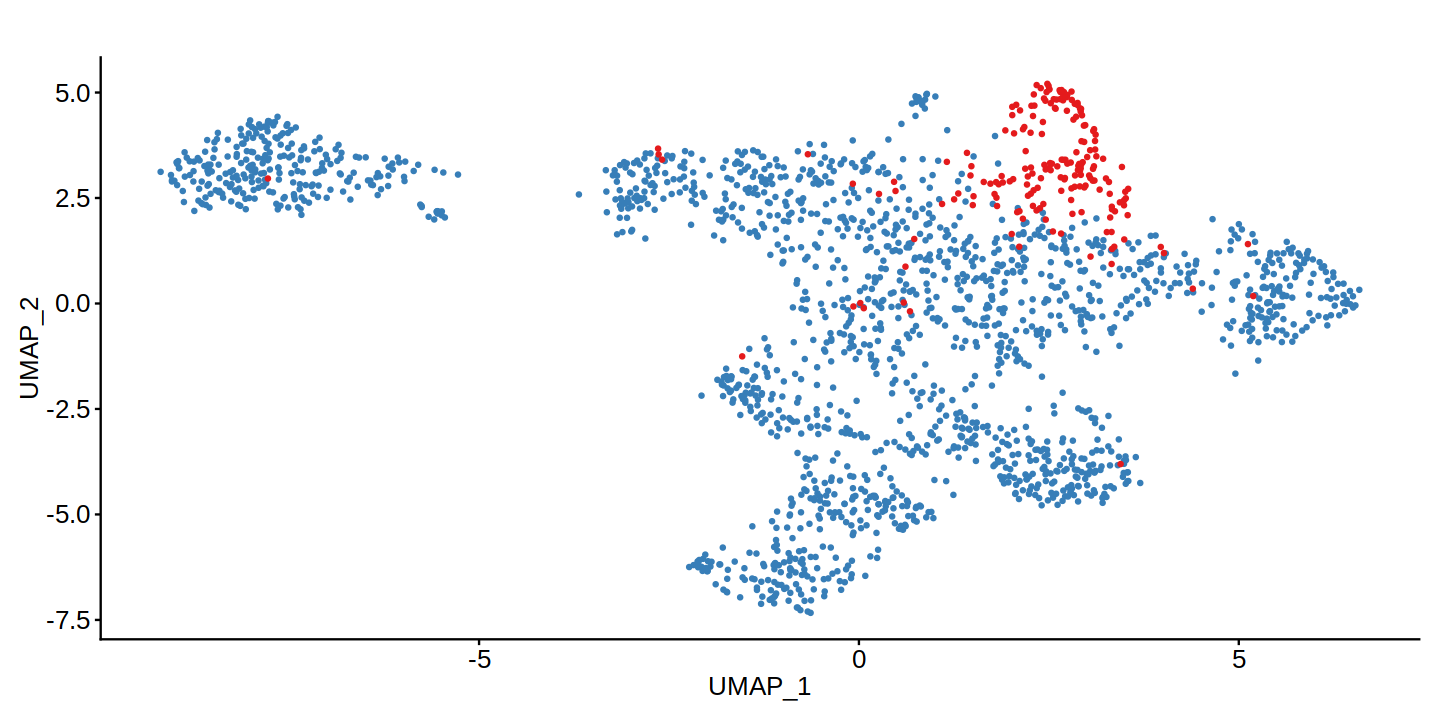

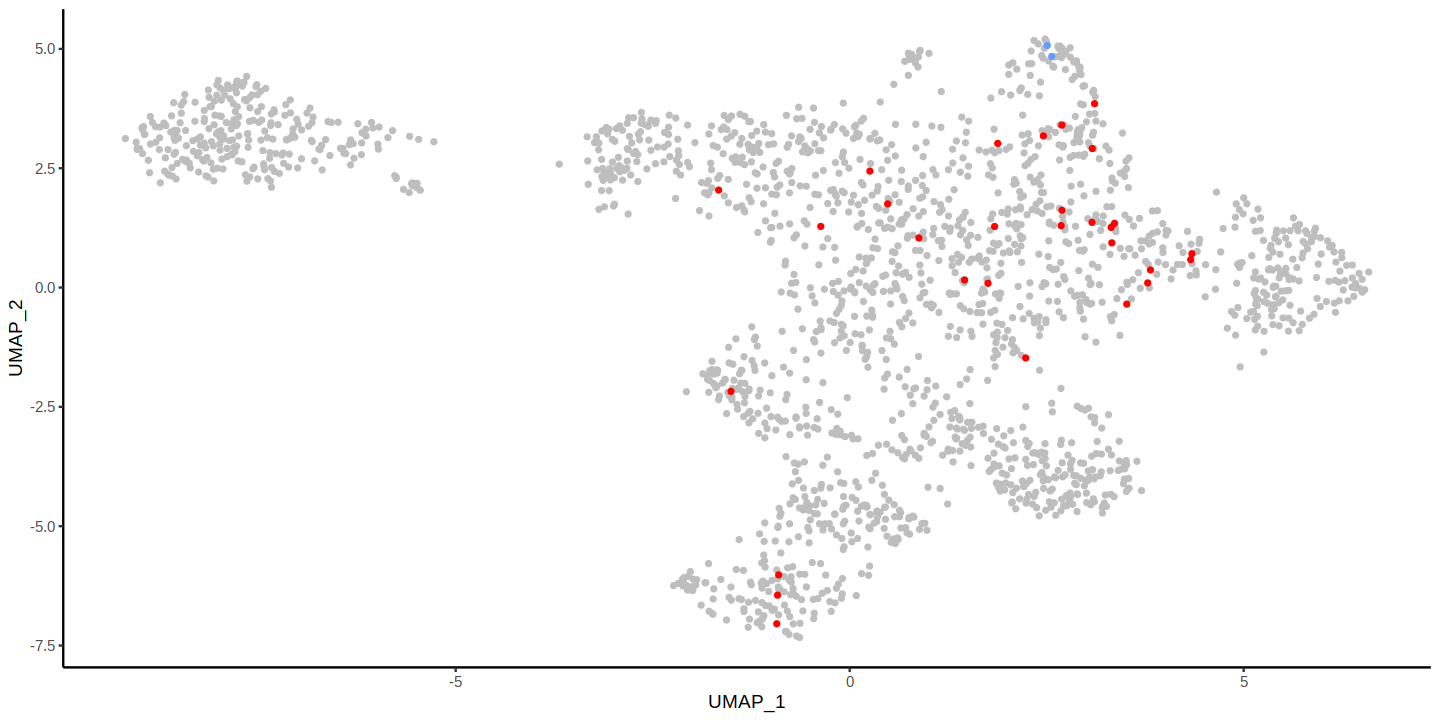

In [28]:
p3 <- embed %>% ggplot(aes(x = UMAP_1, y = UMAP_2, color = top2_x)) + 
    geom_point(size =1) + 
    theme_classic() + 
    scale_color_manual(values = c('#FF0000', '#619CFF', '#BEBEBE')) + theme(legend.position = 'none')
p3

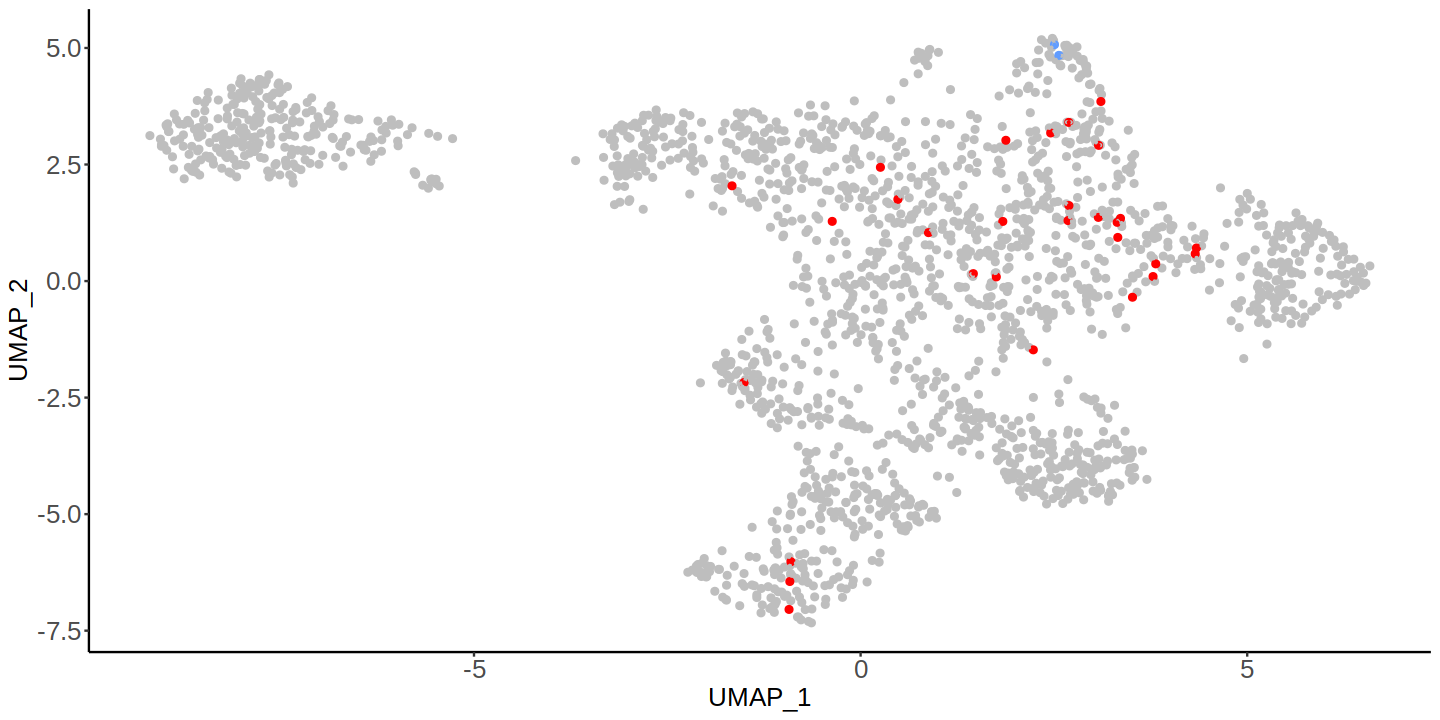

In [39]:
p1 <- p1 + theme(axis.title = element_text(size = 15, color = 'black'), axis.text = element_text(size = 15, color = 'black'), axis.line = element_line(size = 0.5, color = 'black'))
p2 <- p2 + theme(axis.title = element_text(size = 15, color = 'black'), axis.text = element_text(size = 15, color = 'black'), axis.line = element_line(size = 0.5, color = 'black'))
p3 <- p3 + theme(axis.title = element_text(size = 15, color = 'black'), axis.text = element_text(size = 15, color = 'black'), axis.line = element_line(size = 0.5, color = 'black'))

In [41]:
pdf('Fig3.3-2.pdf', width=width, height=height)
p1 + p2 + p3
dev.off()

png 
  2

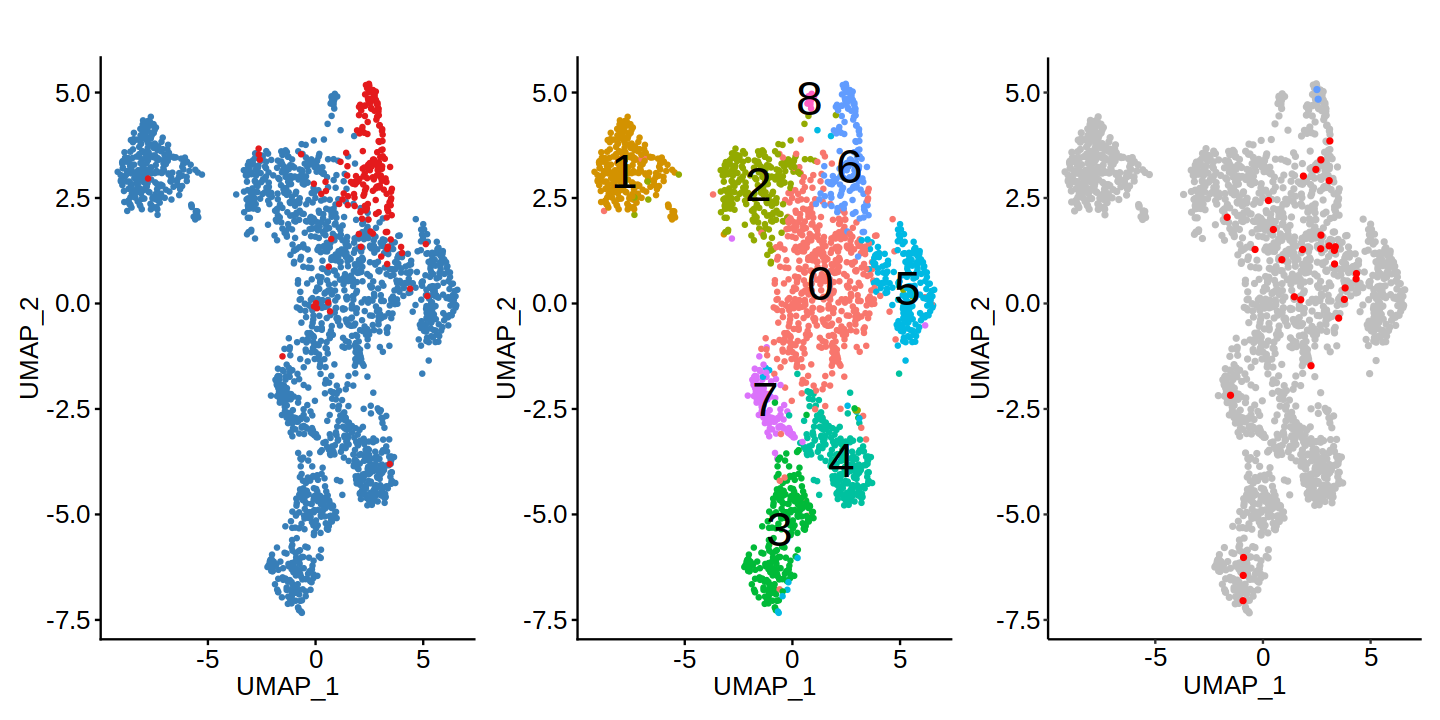

In [40]:
p1 + p2 + p3

In [15]:
markers <- FindMarkers(data_nromalized, ident.1 = 'expand', group.by='new_cluster')

In [ ]:
Idents(data_nromalized) <- 'seurat_clusters'
Idents(data_nromalized)

## Heatmap

In [9]:
markers <- FindAllMarkers(data_nromalized)
markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
p <- DoHeatmap(data_nromalized, features = top10$gene) + NoLegend()

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [15]:
source('Rscript/rprofile.r')
fs(15,12)
pdf('Fig3.heatmap.pdf', width=15, height=12)
p
dev.off()

png 
  2

In [7]:
data <- r('230309_rand_all')

In [14]:
datacsv <- data_nromalized@meta.data %>% dplyr::filter(top2 == TRUE) %>% select(celltype, condition1, seurat_clusters, CTaa.x)

In [20]:
write.csv(datacsv, 'txt/230904_rand.csv')

In [48]:
myvolcanoplot <- function(de, mvalue, qvalue, gene_id){
    library(tidyverse)
    library(ggrepel)
    de$label <- NULL
    de$diffexpressed <- 'NO'
    genes <- c('GNLY', 'GZMB', 'PRF1', 'CCL5', 'HLA-RB1', 'GZMK', 'HLA-DRA', 'HLA-DQB1')
    de <- de %>% mutate(label = case_when(
        gene_id %in% genes ~ gene_id        
    ))
    de <- de %>% mutate(diffexpressed = case_when(
        gene_id %in% genes ~ 'YES',
        TRUE ~ 'NO'
    ))
    return(de)
}
#    ggplot(data = de, aes(x = mvalue, y = -log10(qvalue), col = diffexpressed,
#        label = label)) + geom_point() + theme_minimal() + 
#        geom_text_repel() + scale_color_manual(values=c("red", "black"))}

In [49]:
de <- myvolcanoplot(markers, markers$avg_log2FC, markers$p_val_adj, markers$gene_id)

In [58]:
fs(7,7)
p <- de %>% ggplot(aes(x = avg_log2FC, y = -log10(p_val_adj), col = diffexpressed,
        label = label)) + geom_point() + theme_minimal() + scale_color_manual(values=c("black", "red")) + geom_text_repel() + NoLegend()

pdf('Fig3I.pdf', width = 7, height = 7)
p
dev.off()

Warning message:
“Removed 221 rows containing missing values (`geom_text_repel()`).”


png 
  2

# Fig 3H

In [ ]:
source('Rscript/230103-1singlecell.r')
source('Rscript/myvolcanoplot.r')
data <- r('230309_rand_all')
subset(data, subset = condition1 != 'healthy_CSF') -> data
subset(data, subset = celltype == 'Effector CD8+ T cells') -> data
DefaultAssay(data) <- 'RNA'
myseurat_normalize_umap(data) -> data_nromalized

data_nromalized@meta.data <- data_nromalized@meta.data %>% mutate(new_cluster = case_when(
    seurat_clusters == 6 ~ 'Yes',
    seurat_clusters == 0 ~ 'Yes',
    TRUE ~ 'No'
))

Idents(data_nromalized) <- 'new_cluster'

markers <- FindMarkers(data_nromalized, ident.1 = 'Yes', ident.2 = 'No')

Warning message:
“Removed 221 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 221 rows containing missing values (`geom_text_repel()`).”


png 
  2

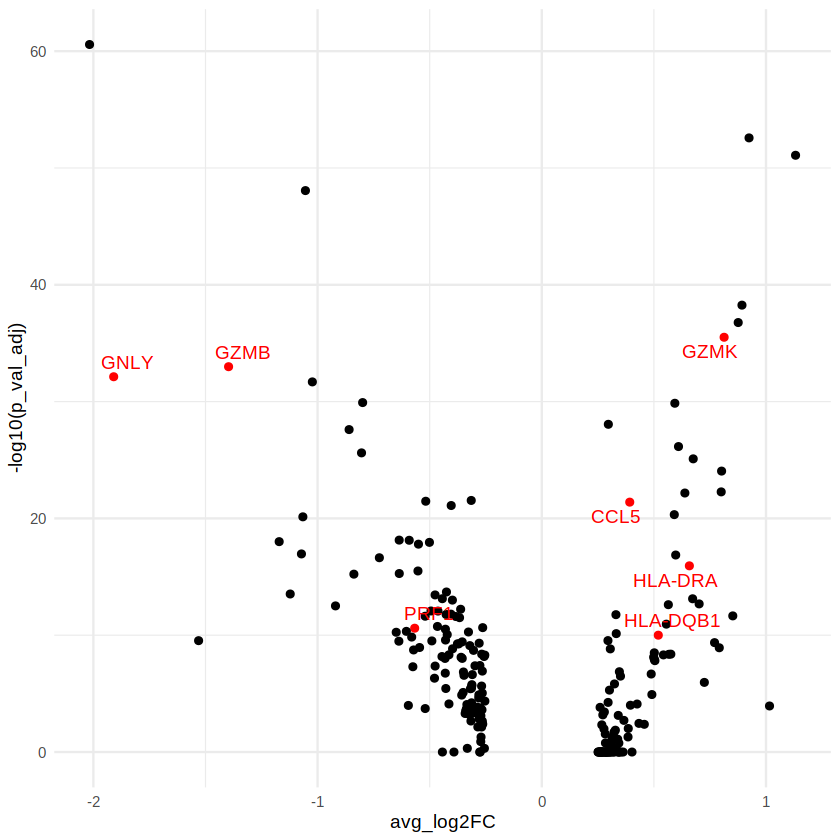

png 
  2

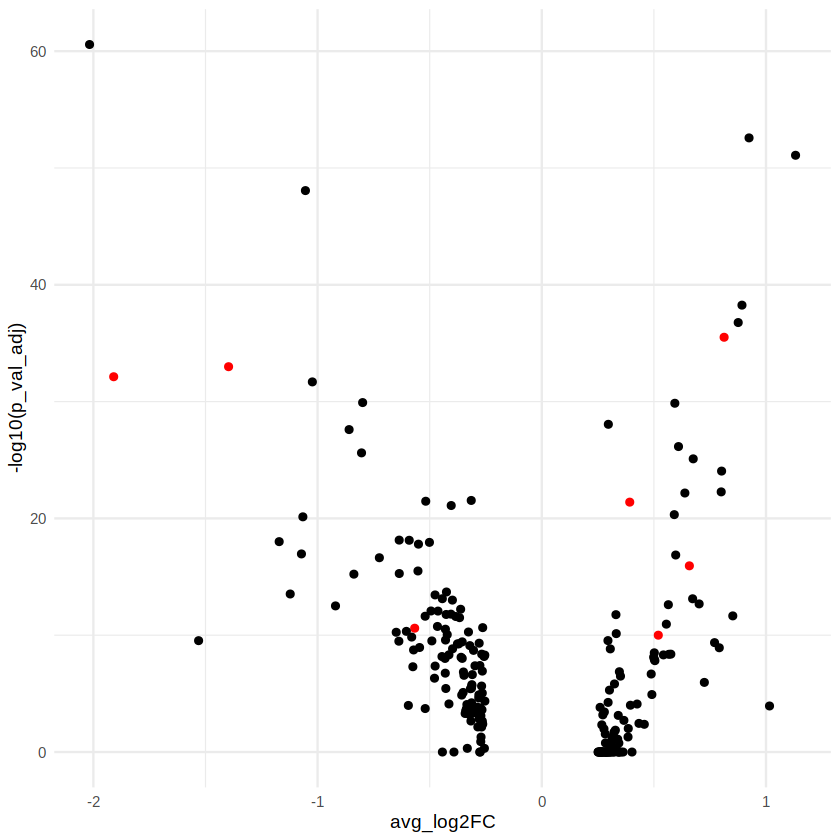

In [47]:
library("ggrepel")
markers$label <- NULL
markers$diffexpressed <- 'NO'
markers$gene_id <- rownames(markers)
genes <- c('GNLY', 'GZMB', 'PRF1', 'CCL5', 'HLA-RB1', 'GZMK', 'HLA-DRA', 'HLA-DQB1')
markers <- markers %>% mutate(label = case_when(
        gene_id %in% genes ~ gene_id        
    ))
markers <- markers %>% mutate(diffexpressed = case_when(
        gene_id %in% genes ~ 'YES',
        TRUE ~ 'NO'
    ))

fs(7,7)
p <- markers %>% ggplot(aes(x = avg_log2FC, y = -log10(p_val_adj), col = diffexpressed,
        label = label)) + geom_point() + theme_minimal() + scale_color_manual(values=c("black", "red")) + geom_text_repel() + NoLegend()

p
pdf('Fig3H.pdf', width = 7, height = 7)
p
dev.off()

p2 <- markers %>% ggplot(aes(x = avg_log2FC, y = -log10(p_val_adj), col = diffexpressed)) + geom_point() + theme_minimal() + scale_color_manual(values=c("black", "red")) +  NoLegend()
p2

pdf('Fig3H(遺伝子名なし).pdf', width = 7, height = 7)
p2
dev.off()

In [60]:
write.csv(markers, 'txt/230915_rand_cd8_markers.csv')

# Fig 3.5

Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tibble’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.3”
Warning message:
“package ‘readr’ was built under R version 4.1.3”
Warning message:
“package ‘purrr’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
Warning message:
“package ‘stringr’ was built under R version 4.1.3”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::l

png 
  2

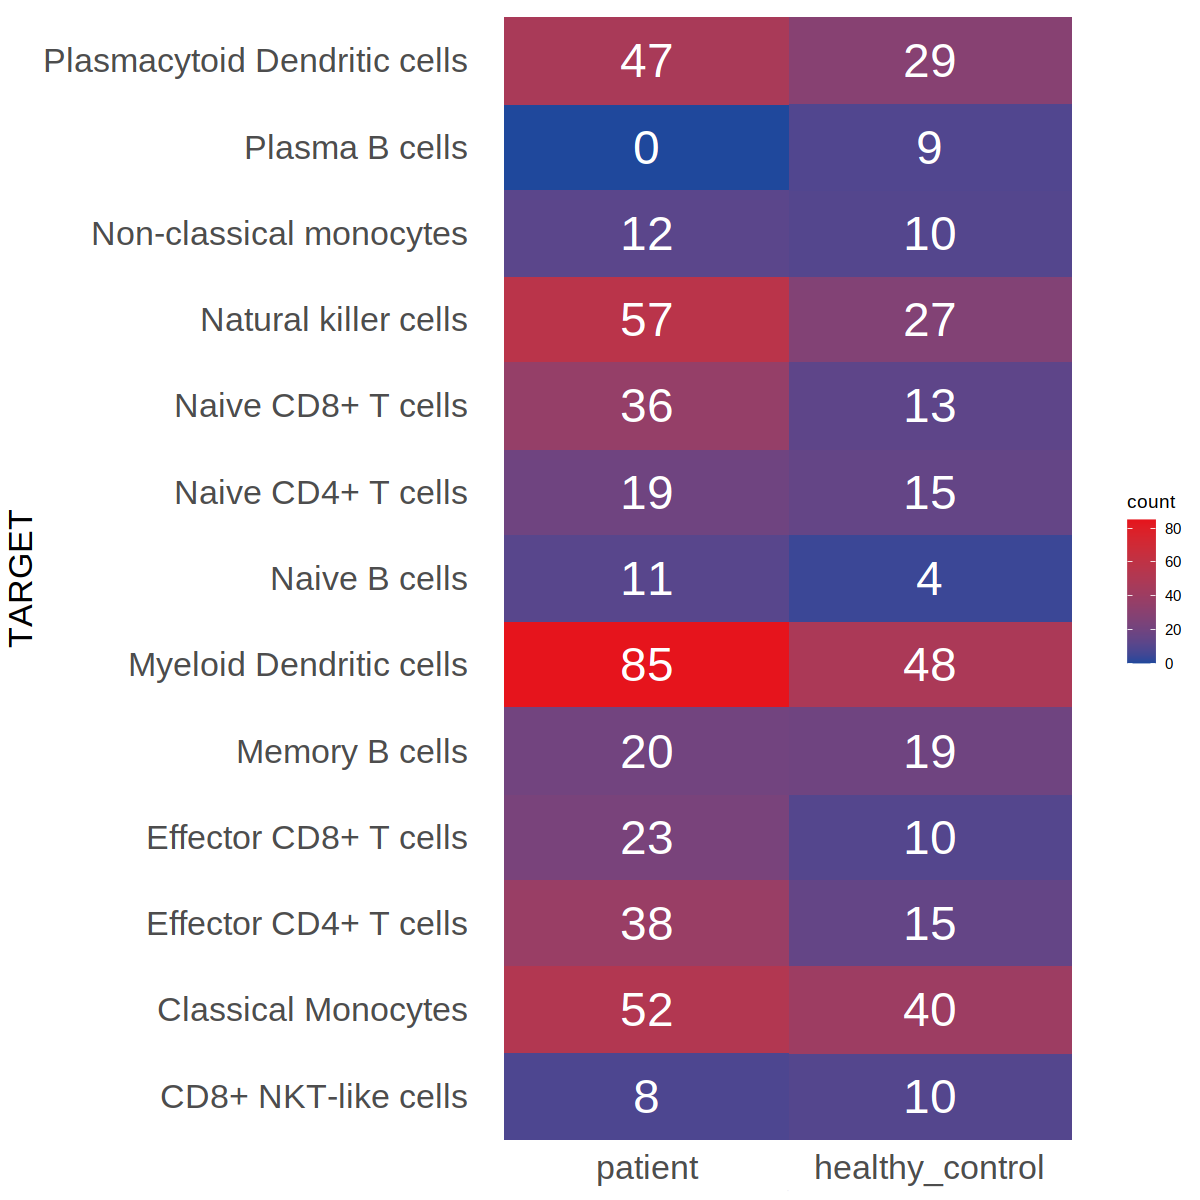

In [2]:
source('Rscript/rprofile.r')
csf_count <- read.csv('cellphonedb/CSF13/out/count_network.txt', sep='\t')
csf_count <- csf_count %>% dplyr::filter(SOURCE == "Effector CD8+ T cells")
healthy_count <- read.csv('cellphonedb/healthy_CSF/out/count_network.txt', sep='\t')
healthy_count <- healthy_count %>% dplyr::filter(SOURCE == "Effector CD8+ T cells")
healthy_count$'type' <- 'healthy_control'
csf_count$'type' <- 'patient'
mix <- rbind(healthy_count, csf_count)
mix <- mix %>% dplyr::filter(TARGET != 'Unknown' & TARGET != 'Platelets' & TARGET !='Progenitor cells') 
fs(10,10)
g <- ggplot(mix, aes(x = type, y = TARGET, fill = count)) + geom_tile() + 
scale_x_discrete(limits = c("patient", "healthy_control")) + 
#coord_flip() +
theme_minimal() + theme(panel.grid=element_blank()) + 
#scale_fill_gradientn(colours = c("black", "red")) +
scale_fill_gradientn(colours = c("#1F489C", "#E6141C")) + 
geom_text(aes(label = count), size = 10, color = "white") +
theme(axis.title.x = element_text(size = 0),
    axis.title.y = element_text(size = 20),
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20))


pdf('Fig3.5.pdf', width=10, height=10)
g
dev.off()
g

In [6]:
mix

SOURCE                TARGET                       count type           
1  Effector CD8+ T cells Effector CD8+ T cells        10    healhty_control
2  Effector CD8+ T cells Naive CD4+ T cells           15    healhty_control
3  Effector CD8+ T cells Effector CD4+ T cells        15    healhty_control
4  Effector CD8+ T cells CD8+ NKT-like cells          10    healhty_control
5  Effector CD8+ T cells Myeloid Dendritic cells      48    healhty_control
6  Effector CD8+ T cells Natural killer cells         27    healhty_control
7  Effector CD8+ T cells Naive CD8+ T cells           13    healhty_control
8  Effector CD8+ T cells Non-classical monocytes      10    healhty_control
9  Effector CD8+ T cells Plasmacytoid Dendritic cells 29    healhty_control
10 Effector CD8+ T cells Memory B cells               19    healhty_control
11 Effector CD8+ T cells Classical Monocytes          40    healhty_control
12 Effector CD8+ T cells Plasma B cells                9    healhty_control
13 Effector CD8+ T cells Progenitor cells             20    healhty_control
14 Effector CD8+ T cells Naive B cells                 4    healhty_control
15 Effector CD8+ T cells Myeloid Dendritic cells      85    patient        
16 Effector CD8+ T cells Plasma B cells                0    patient        
17 Effector CD8+ T cells Effector CD8+ T cells        23    patient        
18 Effector CD8+ T cells Naive CD4+ T cells           19    patient        
19 Effector CD8+ T cells Effector CD4+ T cells        38    patient        
20 Effector CD8+ T cells Natural killer cells         57    patient        
21 Effector CD8+ T cells Non-classical monocytes      12    patient        
22 Effector CD8+ T cells Classical Monocytes          52    patient        
23 Effector CD8+ T cells Naive CD8+ T cells           36    patient        
24 Effector CD8+ T cells Memory B cells               20    patient        
25 Effector CD8+ T cells Naive B cells                11    patient        
26 Effector CD8+ T cells Progenitor cells             19    patient        
27 Effector CD8+ T cells Plasmacytoid Dendritic cells 47    patient        
28 Effector CD8+ T cells CD8+ NKT-like cells           8    patient

# 240307
## Rand

In [1]:
source('Rscript/rprofile.r')
data <- r('240227_rand_csf')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




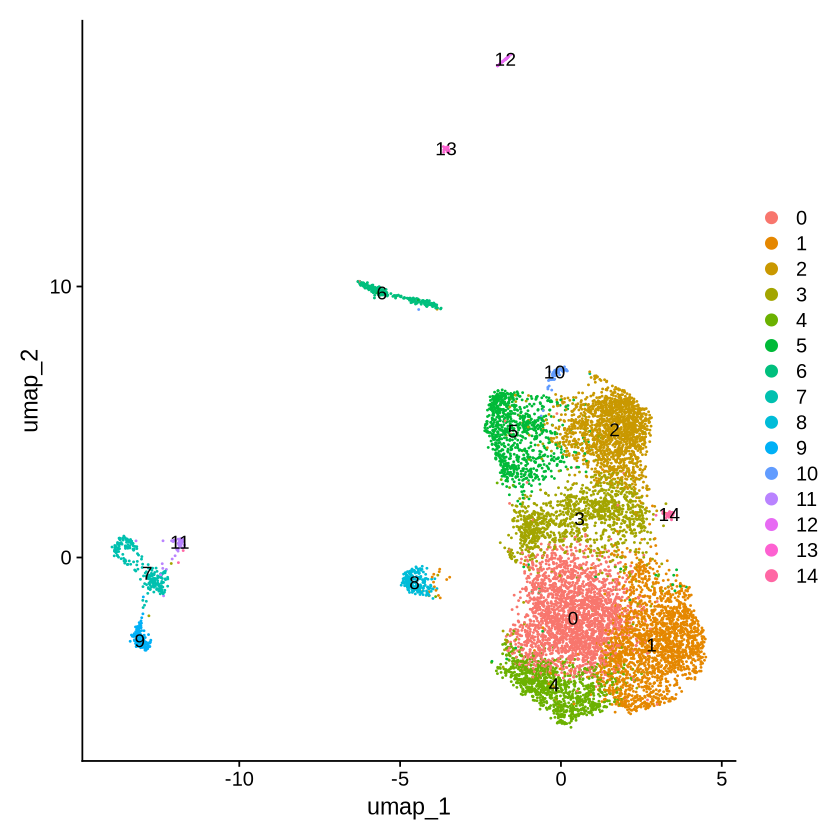

In [3]:
library(Seurat)
DimPlot(data, label=TRUE)

In [5]:
names(data[[]])

[1] "Row.names"                "orig.ident"              
 [3] "nCount_RNA"               "nFeature_RNA"            
 [5] "percent.mt"               "RNA_snn_res.0.5"         
 [7] "seurat_clusters"          "customclassif"           
 [9] "sample"                   "ID"                      
[11] "TCR1"                     "cdr3_aa1"                
[13] "cdr3_nt1"                 "TCR2"                    
[15] "cdr3_aa2"                 "cdr3_nt2"                
[17] "CTgene"                   "CTnt"                    
[19] "CTaa"                     "CTstrict"                
[21] "cellType"                 "cellbarcode"             
[23] "tcr_per_sample"           "number_of_tcr_per_sample"
[25] "proportion_TCR"           "nCount_SCT"              
[27] "nFeature_SCT"             "Row.names.1"             
[29] "nCount_ADT"               "nFeature_ADT"            
[31] "RNA_snn_res.0.8"          "tophashtag"              
[33] "barcode.x"                "sample.x"                
[35] "ID.x"                     "cdr3_aa1.x"              
[37] "cdr3_nt1.x"               "cdr3_aa2.x"              
[39] "cdr3_nt2.x"               "CTgene.x"                
[41] "CTnt.x"                   "CTaa.x"                  
[43] "CTstrict.x"               "cellType.x"              
[45] "barcode.y"                "sample.y"                
[47] "ID.y"                     "IGH"                     
[49] "cdr3_aa1.y"               "cdr3_nt1.y"              
[51] "IGLC"                     "cdr3_aa2.y"              
[53] "cdr3_nt2.y"               "CTgene.y"                
[55] "CTnt.y"                   "CTaa.y"                  
[57] "CTstrict.y"               "cellType.y"              
[59] "integrated_snn_res.0.5"   "TRBV"                    
[61] "TRBJ"                     "TRBD"                    
[63] "TRBC"                     "Epitope.x"               
[65] "Epitope.gene.x"           "Epitope.species.x"       
[67] "V_J"                      "Epitope.species.y"       
[69] "Epitope.y"                "Epitope.gene.y"          
[71] "condition1"               "bcr_per_sample"          
[73] "number_of_bcr_per_sample" "proportion_BCR"          
[75] "common_T"                 "percent"                 
[77] "celltype"                 "condition2"              
[79] "celltype240219"           "celltype240227"

In [8]:
data[[]] <- data[[]] %>% mutate(celltype240227 = case_when(
    seurat_clusters == 1 ~ "Naive CD4 T cells",
    TRUE ~ celltype240227
))

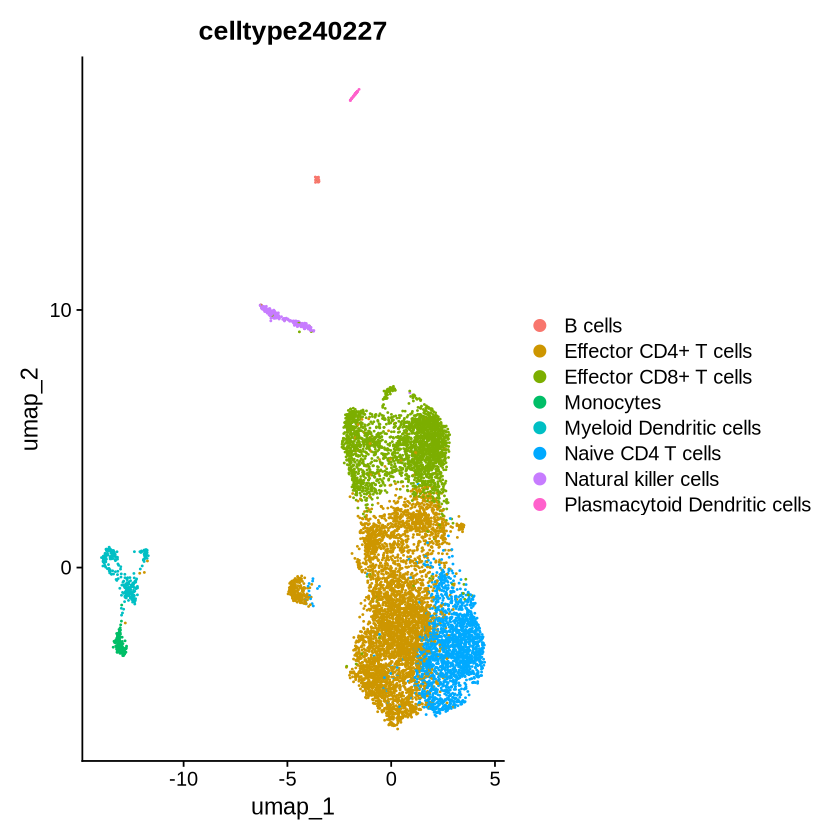

In [9]:
DimPlot(data, group.by='celltype240227')

In [10]:
s(data, 'rand_csf')